In [1]:
import csv
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle


# Make plots with the experiments listed in order of ACC

In [2]:
def unique_channels(file_list):
    all_channels = []
    experiment_names = []
    for file in file_list:
        # break
        #First read the file and get all of the header information
        op = pd.read_csv(file,header=[0])
        col_names = op.columns
        [all_channels.append(i) for i in col_names[1:] if i not in all_channels]
        experiment_names.append(file.split('/')[-1].split('.')[0])
        
    return(all_channels,experiment_names)

def create_pd_dataset(blank_df, file_list):
    for file in file_list:
        # break
        col_name = file.split('/')[-1].split('.')[0]
        #First read the file and get all of the header information
        op = pd.read_csv(file,header=[0])
        col_names = op.columns[1:]
        #Now replace the data in the blank_df
        for i in col_names:
            # break
            blank_df.loc[i,col_name] = op[i][0]
            
    return(blank_df)

def load_ACC_files_make_mean(lead,permuation_dir):
    # Open the file in binary read mode ('rb') and use pickle.load() to load the dictionary
    ACC_path = f'{permuation_dir}/ACC_vals.pkl'
    with open(ACC_path, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    #Take the mean of each experiment
    out_mean = {}
    for ex in list(loaded_dict.keys()):
        # break
        #Get name of each EX
        sp = ex.split('_')
        name = f'{sp[1]}_{sp[3]}'
        out_mean[name] = np.nanmean(loaded_dict[ex])
    
    #rename baseline reforecast
    # Specify the key to be renamed
    old_key = 'MEM_RZSM'
    new_key = 'Baseline_fcst'

    # Create a new key-value pair with the desired key
    out_mean[new_key] = out_mean.pop(old_key)
    out_mean
    
    return(out_mean)


def channel_list_recreate(channels):
    #re-order channels
    rzsm_ = sorted([i for i in channels if 'RZSM' in i])
    element_to_move = 'RZSM_obs_lag-7'
    desired_position = 1  # 3rd position (0-based index)

    rzsm_.remove(element_to_move)  # Remove the element from its current position
    rzsm_.insert(desired_position, element_to_move)
    
    other_channels = [i for i in channels if 'RZSM' not in i]
    
    return(rzsm_+other_channels)

X: 392
Y: 392
C: 392


/glade/derecho/scratch/klesinger/tmp/ipykernel_10405/300432312.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_columns.columns, rotation=45, ha='right')


X: 840
Y: 840
C: 840


/glade/derecho/scratch/klesinger/tmp/ipykernel_10405/300432312.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_columns.columns, rotation=45, ha='right')


X: 896
Y: 896
C: 896


/glade/derecho/scratch/klesinger/tmp/ipykernel_10405/300432312.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_columns.columns, rotation=45, ha='right')


X: 952
Y: 952
C: 952


/glade/derecho/scratch/klesinger/tmp/ipykernel_10405/300432312.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_columns.columns, rotation=45, ha='right')


X: 972
Y: 972
C: 972


/glade/derecho/scratch/klesinger/tmp/ipykernel_10405/300432312.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_columns.columns, rotation=45, ha='right')


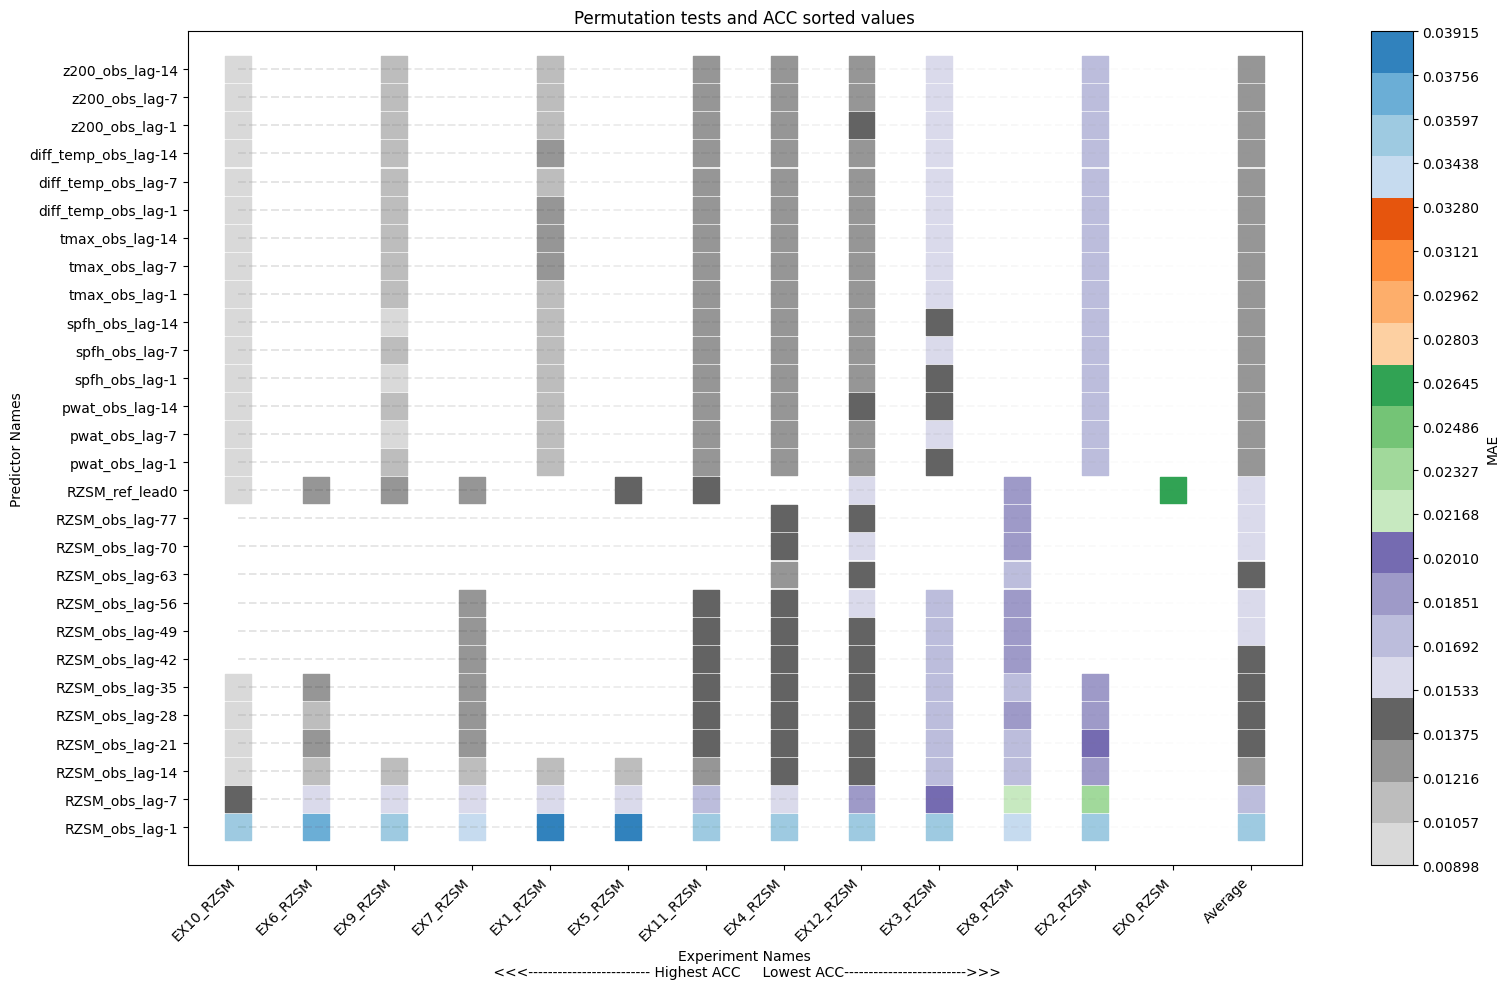

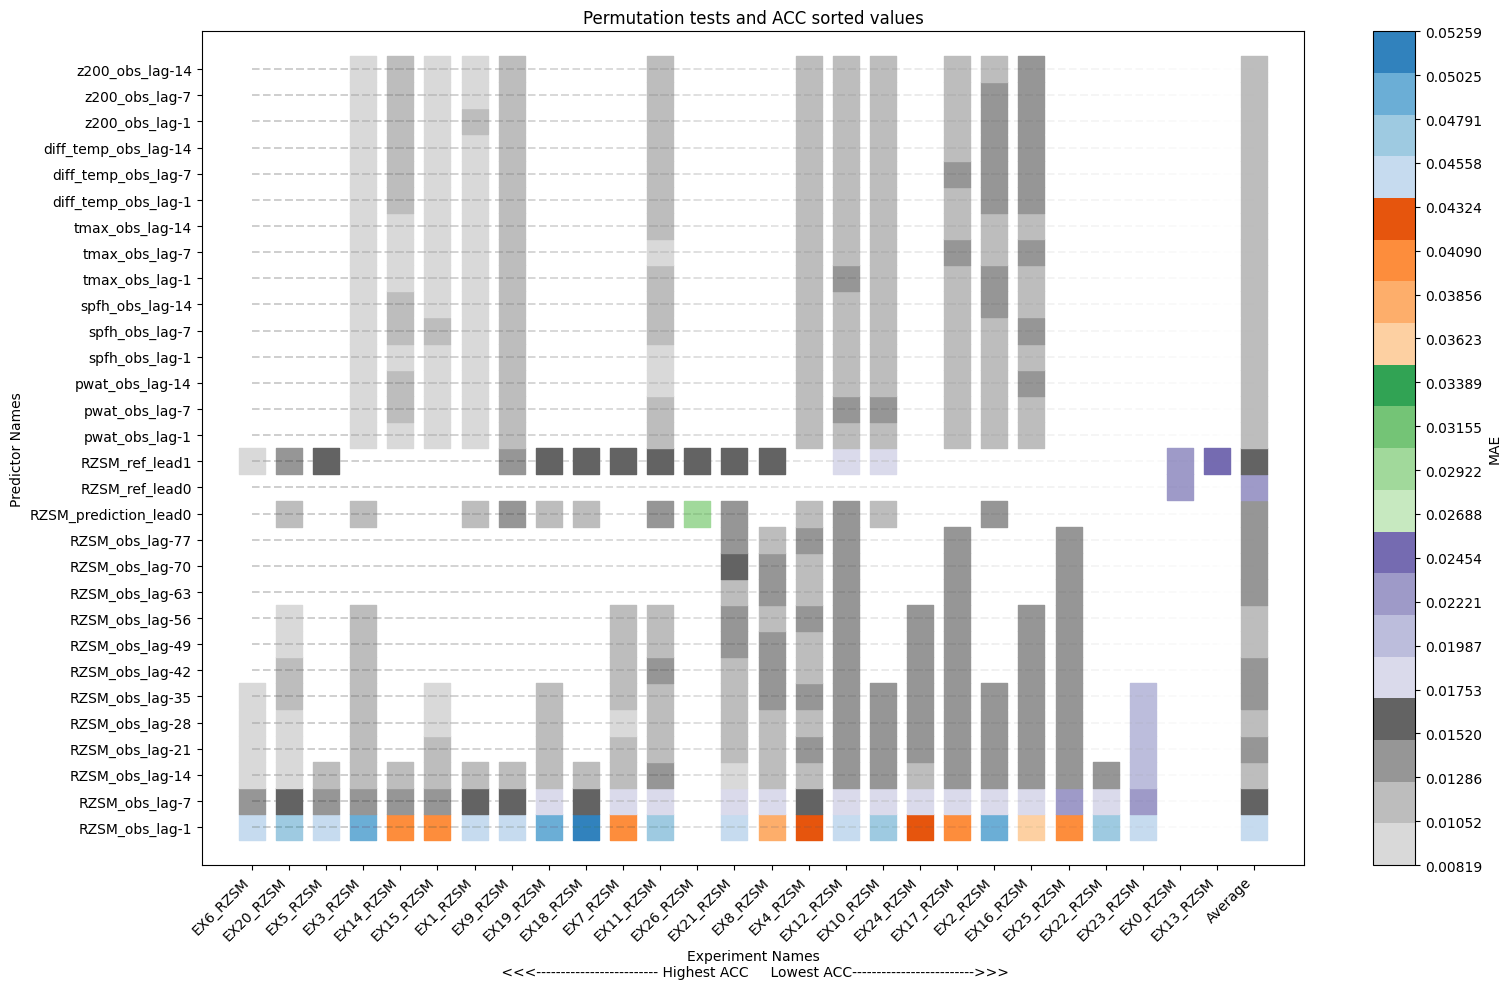

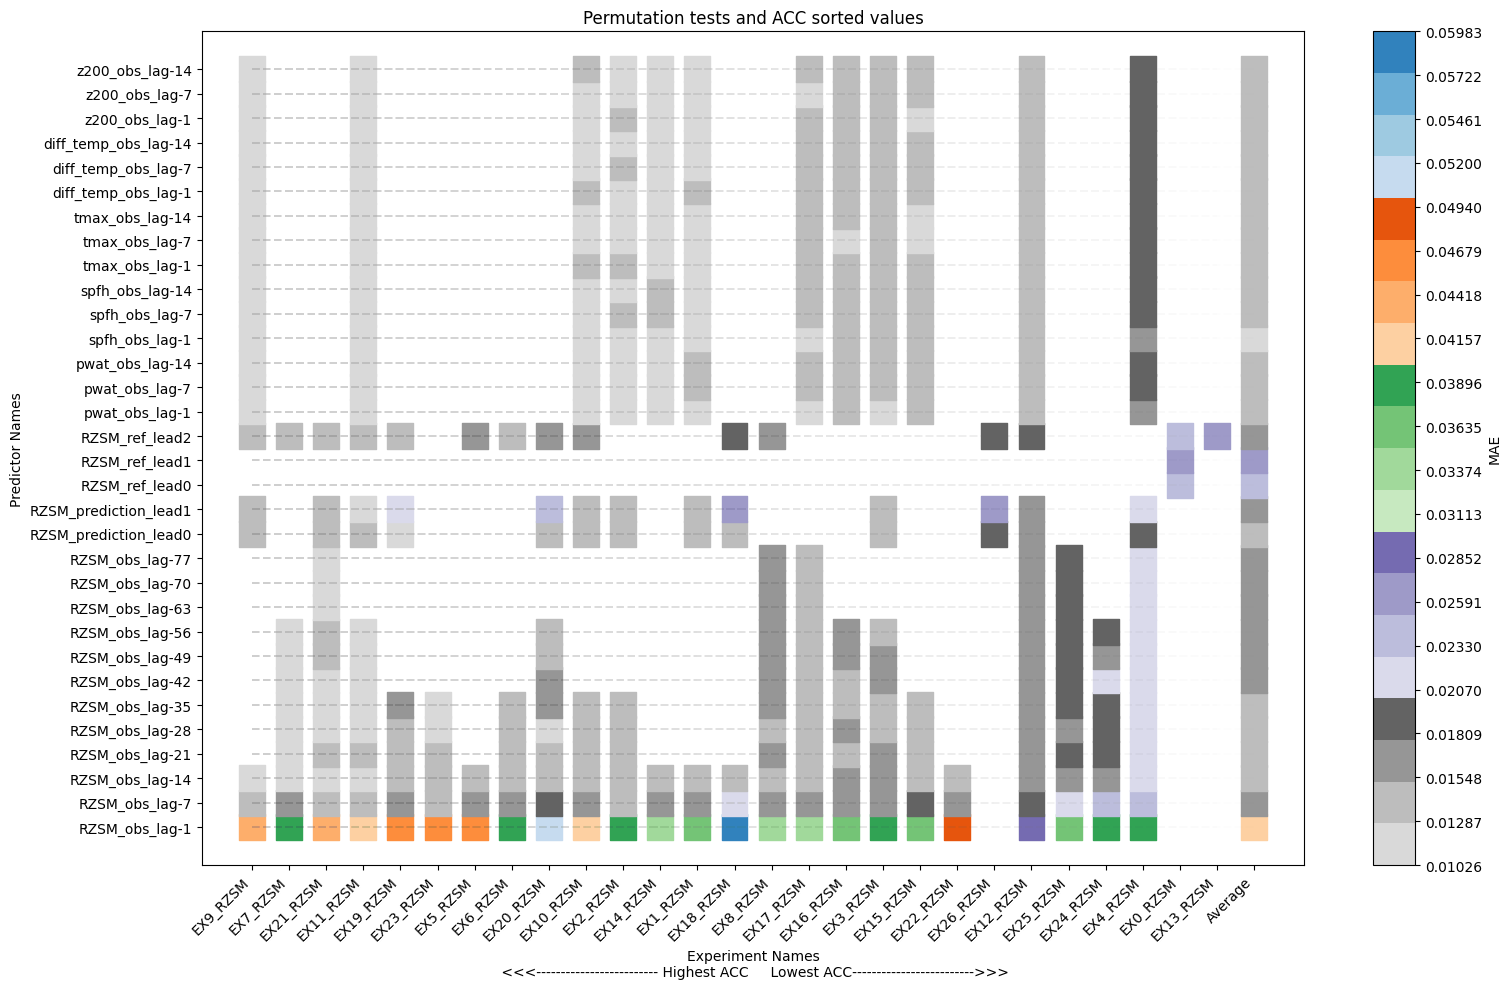

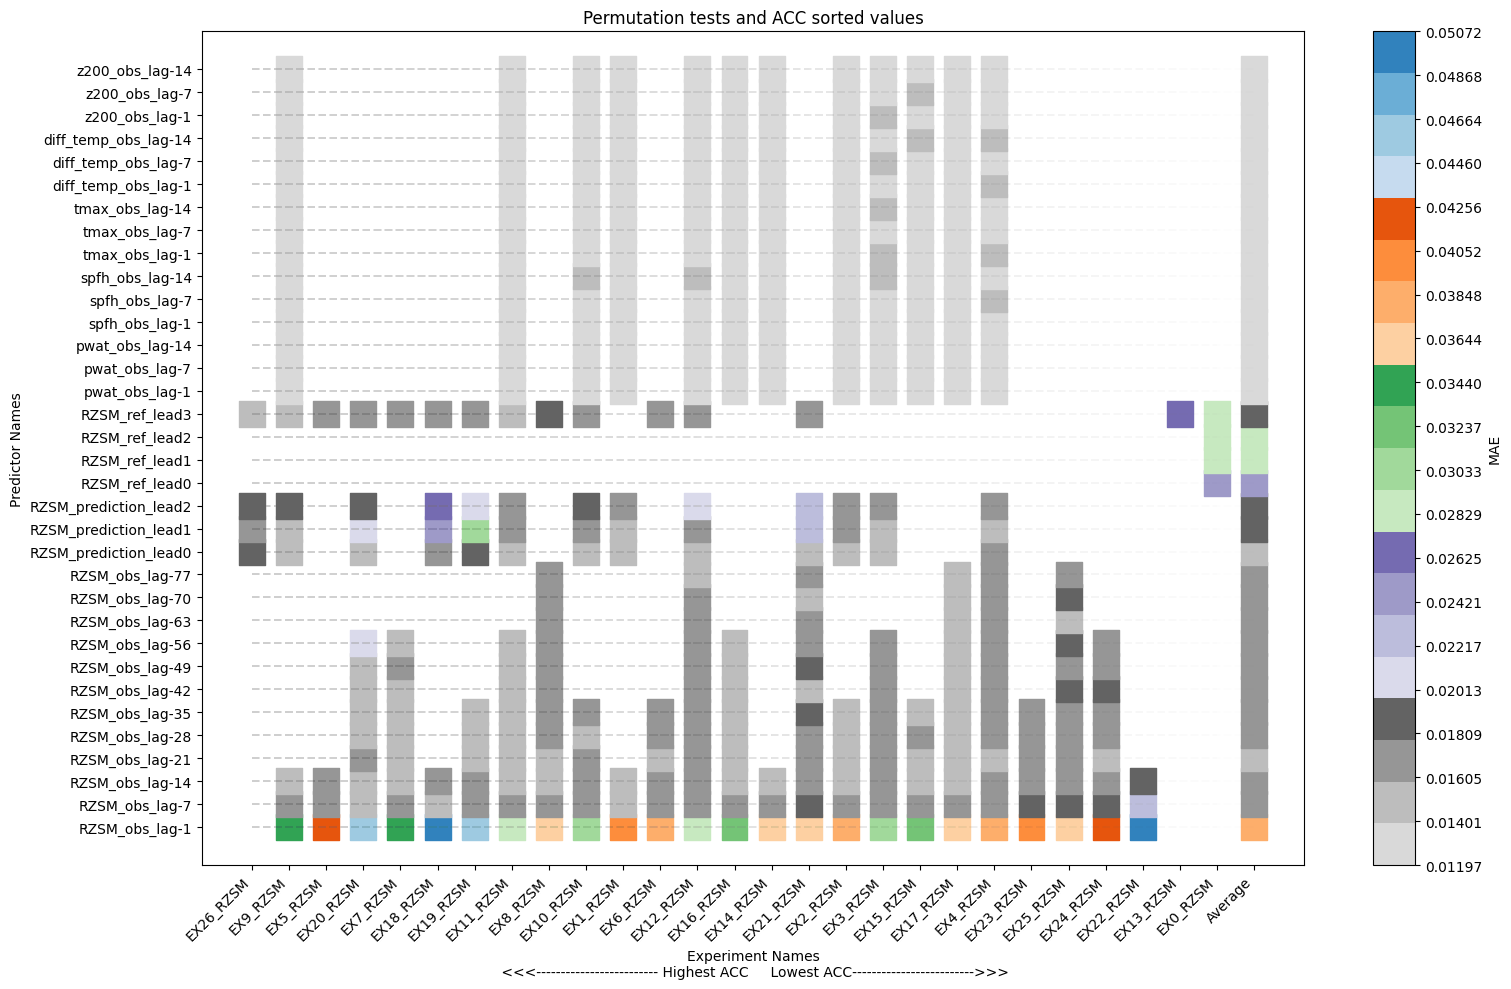

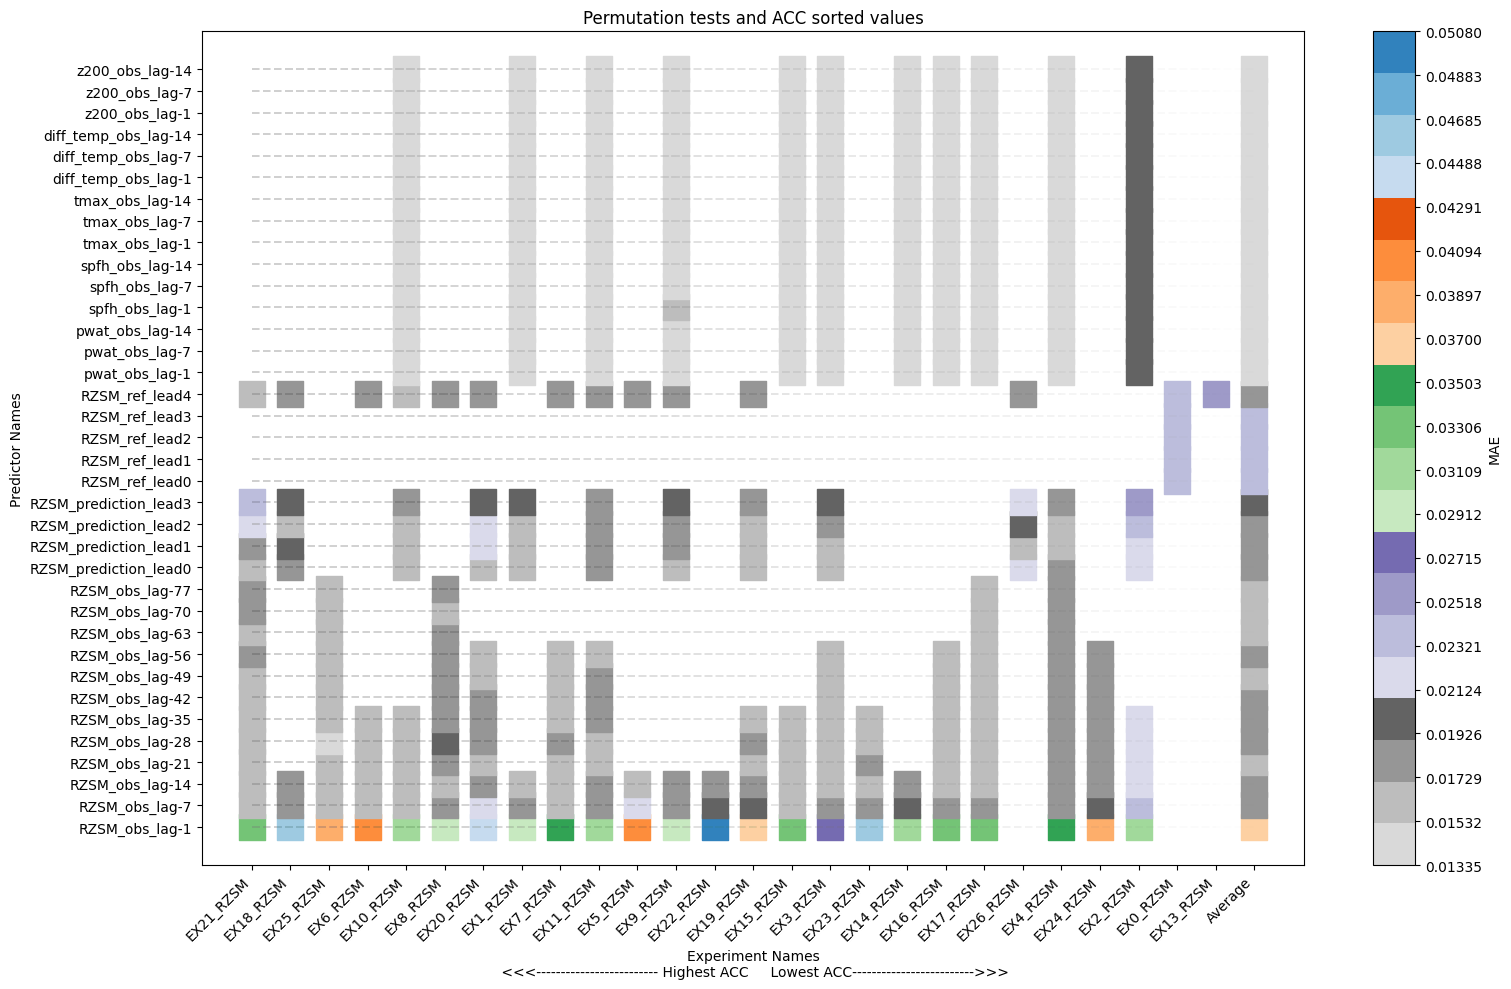

In [4]:

def plot_lead_sorted_ACC_but_not_value(lead):
    permuation_dir = f'Outputs/permutation_tests/Wk_{lead}'

    file_list = glob(f'{permuation_dir}/*RZSM.csv')
    
    #Make list of channel names and experiments
    channels,experiment_names = unique_channels(file_list)
    
    channels =  channel_list_recreate(channels)
    
    mean_ACC = load_ACC_files_make_mean(lead,permuation_dir)
    
    #Don't add the baseline reforecast in this plot
    del mean_ACC['Baseline_fcst']
    
    channels = channels+['ACC']
    
    # Create a blank DataFrame with the specified dimensions
    blank_df = pd.DataFrame(index=channels, columns=experiment_names)

    #Set up within a csv file for plotting
    filled_df = create_pd_dataset(blank_df, file_list)
    
    filled_df['Average'] = filled_df.mean(axis=1)
    
    #Now add ACC values
    for k,v in (mean_ACC.items()):
        # break
        filled_df.loc['ACC',k] = v
    
    #Now sort by ACC value
    # Row index for sorting
    row_index_to_sort_by = -1

    # Get the column indices sorted based on the values in the specified row in descending order
    sorted_column_indices = np.argsort(filled_df.iloc[row_index_to_sort_by].values)[::-1]

    # Select columns based on the sorted indices
    sorted_columns = filled_df.iloc[:, sorted_column_indices]
    
    # Move the first column to the end
    columns = list(sorted_columns.columns)
    columns.append(columns.pop(0))
    sorted_columns = sorted_columns[columns]
    
    #Delete ACC row because it is already sorted
    sorted_columns = sorted_columns.iloc[:-1,:]

    #Get the number of np.nan in each column
    # num_nan_columns = filled_df.isna().sum(axis=0)
    
    # Sort columns based on the number of NaN values in descending order
    # sorted_columns = num_nan_columns.sort_values(ascending=True).index
    
    # Reorder columns based on sorted order
    #re-order columns
    len_experiment = len(experiment_names)
    # new_columns = [f'EX{i}_RZSM' for i in range(0,len_experiment)]
    # new_columns.append('Average')
    
    col_names = sorted_columns.columns
    
    # Flatten the DataFrame for scatter plot
    fig, ax = plt.subplots(figsize=(16, 10))
    x_values = np.tile(sorted_columns.columns, len(channels[:-1]))
    y_values = np.repeat(channels[:-1], len(sorted_columns.columns))
    colors = sorted_columns.values.flatten()
    print(f'X: {len(x_values)}')
    print(f'Y: {len(y_values)}')
    print(f'C: {len(colors)}')
          
    # Plot the scatter plot
    scatter = ax.scatter(x=x_values, y=y_values, c=colors, cmap='tab20c_r', marker='s',s=350)
    
    # Draw lines connecting each point to the x-axis
    for i, (xi, yi) in enumerate(zip(x_values, y_values)):
        plt.hlines(yi, 0, xi, linestyle='dashed', color='gray', alpha=0.01)
        
    # Customize the plot
    ax.set_xlabel('Experiment Names\n <<<------------------------- Highest ACC     Lowest ACC------------------------->>>')
    ax.set_ylabel('Predictor Names')
    ax.set_title('Permutation tests and ACC sorted values')

    # Add a colorbar
    ticks = np.linspace(np.nanmin(colors), np.nanmax(colors), num=20)
    cbar = plt.colorbar(scatter, ax=ax, label='MAE',ticks=ticks)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(sorted_columns.columns, rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'Outputs/permutation_tests/Wk_{lead}_scatterplots_sorted_ACC.png')
    
    # plt.show()
    
    return(0)

for lead in [0,1,2,3,4]:
    plot_lead_sorted_ACC_but_not_value(lead=lead)
    

In [ ]:

def plot_lead_include_ACC_value_also(lead):
    permuation_dir = f'Outputs/permutation_tests/Wk_{lead}'

    file_list = glob(f'{permuation_dir}/*RZSM.csv')
    
    #Make list of channel names and experiments
    channels,experiment_names = unique_channels(file_list)
    
    channels =  channel_list_recreate(channels)
    
    mean_ACC = load_ACC_files_make_mean(lead,permuation_dir)
    
    channels = channels+['ACC']
    
    # Create a blank DataFrame with the specified dimensions
    blank_df = pd.DataFrame(index=channels, columns=experiment_names)

    #Set up within a csv file for plotting
    filled_df = create_pd_dataset(blank_df, file_list)
    
    filled_df['Baseline_fcst'] = np.nan
    
    filled_df['Average'] = filled_df.mean(axis=1)
    
    #Now add ACC values
    for k,v in (mean_ACC.items()):
        # break
        filled_df.loc['ACC',k] = v
    
    #Now sort by ACC value
    # Row index for sorting
    row_index_to_sort_by = -1

    # Get the column indices sorted based on the values in the specified row in descending order
    sorted_column_indices = np.argsort(filled_df.iloc[row_index_to_sort_by].values)[::-1]

    # Select columns based on the sorted indices
    sorted_columns = filled_df.iloc[:, sorted_column_indices]
    
    # Move the first column to the end
    columns = list(sorted_columns.columns)
    columns.append(columns.pop(0))
    sorted_columns = sorted_columns[columns]
    
    #ACC col, row
    acc_row = sorted_columns.iloc[-1,:]
    #Delete ACC row because it is already sorted
    sorted_columns = sorted_columns.iloc[:-1,:]

    #Get the number of np.nan in each column
    # num_nan_columns = filled_df.isna().sum(axis=0)
    
    # Sort columns based on the number of NaN values in descending order
    # sorted_columns = num_nan_columns.sort_values(ascending=True).index
    
    # Reorder columns based on sorted order
    #re-order columns
    len_experiment = len(experiment_names)
    # new_columns = [f'EX{i}_RZSM' for i in range(0,len_experiment)]
    # new_columns.append('Average')
    
    col_names = sorted_columns.columns
    
    # Flatten the DataFrame for scatter plot
    fig, ax1 = plt.subplots(figsize=(16, 10))
    x_values = np.tile(sorted_columns.columns, len(channels[:-1]))
    y_values = np.repeat(channels[:-1], len(sorted_columns.columns))
    colors = sorted_columns.values.flatten()
    print(f'X: {len(x_values)}')
    print(f'Y: {len(y_values)}')
    print(f'C: {len(colors)}')
          
    # Plot the scatter plot
    scatter=ax1.scatter(x=x_values, y=y_values, c=colors, cmap='tab20c_r', marker='s',s=350)
    ax1.set_xticklabels(sorted_columns.columns, rotation=45, ha='right')
    
    # Draw lines connecting each point to the x-axis
    for i, (xi, yi) in enumerate(zip(x_values, y_values)):
        plt.hlines(yi, 0, xi, linestyle='dashed', color='gray', alpha=0.01)
    
    cbar = plt.colorbar(scatter, ax=ax1, label='MAE')
    
    # Create a twin Axes for the second scatter plot
    ax2 = ax1.twinx()
    ax2.scatter(col_names, acc_row, marker='o', label='Scatter Plot 2', color='red')
    
    ax2.set_title(f'Week {lead} UNET predictions\n Permutation and ACC values')

#     # Add a colorbar
#     ticks = np.linspace(np.nanmin(colors), np.nanmax(colors), num=20)
    
    
#     # Rotate x-axis labels for better readability
#     ax.set_xticklabels(sorted_columns.columns, rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'Outputs/permutation_tests/Wk_{lead}_scatterplots_with_ACC_values.png')
    
    # plt.show()
    
    
    
    return(0)

for lead in [0,1,2,3,4]:
    plot_lead_include_ACC_value_also(lead=lead)
    

# Make plots with the experiments listed in order type of Experiment

In [ ]:

def plot_lead_experiment_type_ACC_value_also(lead):

    # def plot_lead_experiment_type_ACC_value_also(lead):
    permuation_dir = f'Outputs/permutation_tests/Wk_{lead}'

    file_list = glob(f'{permuation_dir}/*RZSM.csv')

    #Make list of channel names and experiments
    channels,experiment_names = unique_channels(file_list)

    channels =  channel_list_recreate(channels)

    mean_ACC = load_ACC_files_make_mean(lead,permuation_dir)

    channels = channels+['ACC']

    # Create a blank DataFrame with the specified dimensions
    blank_df = pd.DataFrame(index=channels, columns=experiment_names)

    #Set up within a csv file for plotting
    filled_df = create_pd_dataset(blank_df, file_list)


    filled_df['Baseline_fcst'] = np.nan


    if lead == 0:
        column_order = ['EX0','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX12','EX5','EX6','EX7','EX8']
        #For plotting
        tick_labels1 = [f'{i}\nBC' for i in column_order[0:1]]
        #Set colors
        color1 = {k:'blue' for k in tick_labels1}

        tick_labels2 = [f'{i}\nOBS' for i in column_order[1:]]
        color2 = {k:'green' for k in tick_labels2}

        tick_labels = tick_labels1+tick_labels2
        tick_labels = tick_labels + ['Baseline\nGEFSv12']
        #combine color dictionaries
        color1.update(color2)
        color1.update({tick_labels[-1]:'black'})


        column_order = [f'{i}_RZSM' for i in column_order]
        column_order.append('Baseline_fcst')

    elif lead in [1,2,3]:
        column_order = ['EX0','EX13','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX12','EX18','EX19','EX20','EX21','EX5','EX6','EX7','EX8','EX22','EX23','EX24','EX25','EX14','EX15','EX16','EX17','EX26']
        #For plotting
        tick_labels1 = [f'{i}\nBC' for i in column_order[0:2]]
        color1 = {k:'blue' for k in tick_labels1}

        tick_labels2 = [f'{i}\nOBS-AR' for i in column_order[2:14]]
        color1.update({k:'red' for k in tick_labels2})

        tick_labels3 = [f'{i}\nOBS' for i in column_order[14:26]]
        color1.update({k:'green' for k in tick_labels3})

        tick_labels4 = [f'{column_order[-1]}\nAR']
        color1.update({k:'purple' for k in tick_labels4})

        tick_labels = tick_labels1+tick_labels2+tick_labels3+tick_labels4
        tick_labels = tick_labels + ['Baseline\nGEFSv12']
        color1.update({tick_labels[-1]:'black'})

        column_order = [f'{i}_RZSM' for i in column_order]
        column_order.append('Baseline_fcst')

    elif lead == 4:
        # We don't have an experiment 12
        column_order = ['EX0','EX13','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX18','EX19','EX20','EX21','EX5','EX6','EX7','EX8','EX22','EX23','EX24','EX25','EX14','EX15','EX16','EX17','EX26']
        #For plotting
        tick_labels1 = [f'{i}\nBC' for i in column_order[0:2]]
        color1 = {k:'blue' for k in tick_labels1}

        tick_labels2 = [f'{i}\nOBS-AR' for i in column_order[2:13]]
        color1.update({k:'red' for k in tick_labels2})

        tick_labels3 = [f'{i}\nOBS' for i in column_order[13:25]]
        color1.update({k:'green' for k in tick_labels3})

        tick_labels4 = [f'{column_order[-1]}\nAR']
        color1.update({k:'purple' for k in tick_labels4})

        tick_labels = tick_labels1+tick_labels2+tick_labels3+tick_labels4
        tick_labels = tick_labels + ['Baseline\nGEFSv12']
        color1.update({tick_labels[-1]:'black'})

        column_order = [f'{i}_RZSM' for i in column_order]
        column_order.append('Baseline_fcst')

    #Re-order by column
    filled_df = filled_df[column_order]

    # Replace all non-NaN values with 1
    filled_df = filled_df.applymap(lambda x: 1 if pd.notna(x) else x)

    #Now add ACC values
    for k,v in (mean_ACC.items()):
        # break
        filled_df.loc['ACC',k] = v

    acc_row = filled_df.iloc[-1,:]

    #Use for plotting
    len_experiment = len(experiment_names)

    col_names = filled_df.columns

    # Flatten the DataFrame for scatter plot
    fig, ax1 = plt.subplots(figsize=(16, 10))
    x_values = np.tile(filled_df.columns, len(channels[:-1]))
    y_values = np.repeat(channels[:-1], len(filled_df.columns))
    colors = filled_df[:-1].values.flatten()

    print(f'X: {len(x_values)}')
    print(f'Y: {len(y_values)}')
    print(f'C: {len(colors)}')

    # Plot the scatter plot
    scatter=ax1.scatter(x=x_values, y=y_values, c=colors, cmap='tab20c_r', marker='s',s=350)
    # Set the x-axis labels and colors
    ax1.set_xticklabels('', rotation=45, ha='center')

    if lead in [1,2,3]:
        base_drop = 2.5
        cat_drop = 2.3
    elif lead == 0:
        base_drop = 2
        cat_drop = 1.7
    elif lead == 4:
        base_drop = 2.8
        cat_drop = 2.5

    for i, category in enumerate(tick_labels):
        # break
        if category == 'Baseline\nGEFSv12':
            plt.text(i , plt.ylim()[0] - base_drop, category, color=color1.get(category, 'black'), rotation=45, ha='center')
        else:
            plt.text(i , plt.ylim()[0] - cat_drop, category, color=color1.get(category, 'black'), rotation=45, ha='center')



    # Draw lines connecting each point to the x-axis
    for i, (xi, yi) in enumerate(zip(x_values, y_values)):
        plt.hlines(yi, 0, xi, linestyle='dashed', color='gray', alpha=0.01)

    # cbar = plt.colorbar(scatter, ax=ax1, label='MAE')

    # Create a twin Axes for the second scatter plot
    ax2 = ax1.twinx()
    ax2.scatter(col_names, acc_row, marker='o', label='Scatter Plot 2', color='red')

    ax2.set_title(f'Week {lead} UNET predictions\n Permutation and ACC values')

    #     # Add a colorbar
    #     ticks = np.linspace(np.nanmin(colors), np.nanmax(colors), num=20)


    #     # Rotate x-axis labels for better readability
    #     ax.set_xticklabels(sorted_columns.columns, rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'Outputs/permutation_tests/Wk_{lead}_scatterplots_with_ACC_values_no_permuation_values.png')

    plt.show()
    
    
    return(0)

for lead in [0,1,2,3,4]:
# for lead in [1]:
    plot_lead_experiment_type_ACC_value_also(lead=lead)
    

In [9]:
def load_ACC_files_all_values(lead,permuation_dir):
    # Open the file in binary read mode ('rb') and use pickle.load() to load the dictionary
    ACC_path = f'{permuation_dir}/ACC_vals.pkl'
    with open(ACC_path, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    #Take the mean of each experiment
    out_mean = {}
    for ex in list(loaded_dict.keys()):
        # break
        #Get name of each EX
        sp = ex.split('_')
        name = f'{sp[1]}_{sp[3]}'
        out_mean[name] = loaded_dict[ex]
    
    #rename baseline reforecast
    # Specify the key to be renamed
    old_key = 'MEM_RZSM'
    new_key = 'Baseline_fcst'

    # Create a new key-value pair with the desired key
    out_mean[new_key] = out_mean.pop(old_key)
    out_mean
    
    return(out_mean)

In [ ]:

def plot_only_ACC(lead):

    # def plot_lead_experiment_type_ACC_value_also(lead):
    permuation_dir = f'Outputs/permutation_tests/Wk_{lead}'

    file_list = glob(f'{permuation_dir}/*RZSM.csv')

    #Make list of channel names and experiments
    channels,experiment_names = unique_channels(file_list)

    channels =  channel_list_recreate(channels)

    mean_ACC = load_ACC_files_make_mean(lead,permuation_dir)

    channels = channels+['ACC']

    # Create a blank DataFrame with the specified dimensions
    blank_df = pd.DataFrame(index=channels, columns=experiment_names)

    #Set up within a csv file for plotting
    filled_df = create_pd_dataset(blank_df, file_list)


    filled_df['Baseline_fcst'] = np.nan


    if lead == 0:
        column_order = ['EX0','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX12','EX5','EX6','EX7','EX8']
        #For plotting
        tick_labels1 = [f'{i}\nBC' for i in column_order[0:1]]
        #Set colors
        color1 = {k:'blue' for k in tick_labels1}

        tick_labels2 = [f'{i}\nOBS' for i in column_order[1:]]
        color2 = {k:'green' for k in tick_labels2}

        tick_labels = tick_labels1+tick_labels2
        tick_labels = tick_labels + ['Baseline\nGEFSv12']
        #combine color dictionaries
        color1.update(color2)
        color1.update({tick_labels[-1]:'black'})


        column_order = [f'{i}_RZSM' for i in column_order]
        column_order.append('Baseline_fcst')

    elif lead in [1,2,3]:
        column_order = ['EX0','EX13','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX12','EX18','EX19','EX20','EX21','EX5','EX6','EX7','EX8','EX22','EX23','EX24','EX25','EX14','EX15','EX16','EX17','EX26']
        #For plotting
        tick_labels1 = [f'{i}\nBC' for i in column_order[0:2]]
        color1 = {k:'blue' for k in tick_labels1}

        tick_labels2 = [f'{i}\nOBS-AR' for i in column_order[2:14]]
        color1.update({k:'red' for k in tick_labels2})

        tick_labels3 = [f'{i}\nOBS' for i in column_order[14:26]]
        color1.update({k:'green' for k in tick_labels3})

        tick_labels4 = [f'{column_order[-1]}\nAR']
        color1.update({k:'purple' for k in tick_labels4})

        tick_labels = tick_labels1+tick_labels2+tick_labels3+tick_labels4
        tick_labels = tick_labels + ['Baseline\nGEFSv12']
        color1.update({tick_labels[-1]:'black'})

        column_order = [f'{i}_RZSM' for i in column_order]
        column_order.append('Baseline_fcst')

    elif lead == 4:
        # We don't have an experiment 12
        column_order = ['EX0','EX13','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX18','EX19','EX20','EX21','EX5','EX6','EX7','EX8','EX22','EX23','EX24','EX25','EX14','EX15','EX16','EX17','EX26']
        #For plotting
        tick_labels1 = [f'{i}\nBC' for i in column_order[0:2]]
        color1 = {k:'blue' for k in tick_labels1}

        tick_labels2 = [f'{i}\nOBS-AR' for i in column_order[2:13]]
        color1.update({k:'red' for k in tick_labels2})

        tick_labels3 = [f'{i}\nOBS' for i in column_order[13:25]]
        color1.update({k:'green' for k in tick_labels3})

        tick_labels4 = [f'{column_order[-1]}\nAR']
        color1.update({k:'purple' for k in tick_labels4})

        tick_labels = tick_labels1+tick_labels2+tick_labels3+tick_labels4
        tick_labels = tick_labels + ['Baseline\nGEFSv12']
        color1.update({tick_labels[-1]:'black'})

        column_order = [f'{i}_RZSM' for i in column_order]
        column_order.append('Baseline_fcst')

    #Re-order by column
    filled_df = filled_df[column_order]

    # Replace all non-NaN values with 1
    filled_df = filled_df.applymap(lambda x: 1 if pd.notna(x) else x)

    #Now add ACC values
    for k,v in (mean_ACC.items()):
        # break
        filled_df.loc['ACC',k] = v

    acc_row = filled_df.iloc[-1,:]

    col_names = filled_df.columns

    # Flatten the DataFrame for scatter plot
    fig, ax1 = plt.subplots(figsize=(16, 10))

    # Plot the scatter plot
    plt.bar(column_order, acc_row, color='green', alpha=0.7)
    # Set the x-axis labels and colors
    plt.xticks('', rotation=45, ha='center')


    base_drop = 0.08
    cat_drop = 0.05


    for i, category in enumerate(tick_labels):
        # break
        if category == 'Baseline\nGEFSv12':
            plt.text(i , plt.ylim()[0] - base_drop, category, color=color1.get(category, 'black'), rotation=45, ha='center')
        else:
            plt.text(i , plt.ylim()[0] - cat_drop, category, color=color1.get(category, 'black'), rotation=45, ha='center')


    plt.tight_layout()
    plt.savefig(f'Outputs/permutation_tests/Wk_{lead}_ACC_only.png')

    plt.show()
    
    
    return(0)

for lead in [0,1,2,3,4]:
# for lead in [1]:
    plot_only_ACC(lead=lead)
    

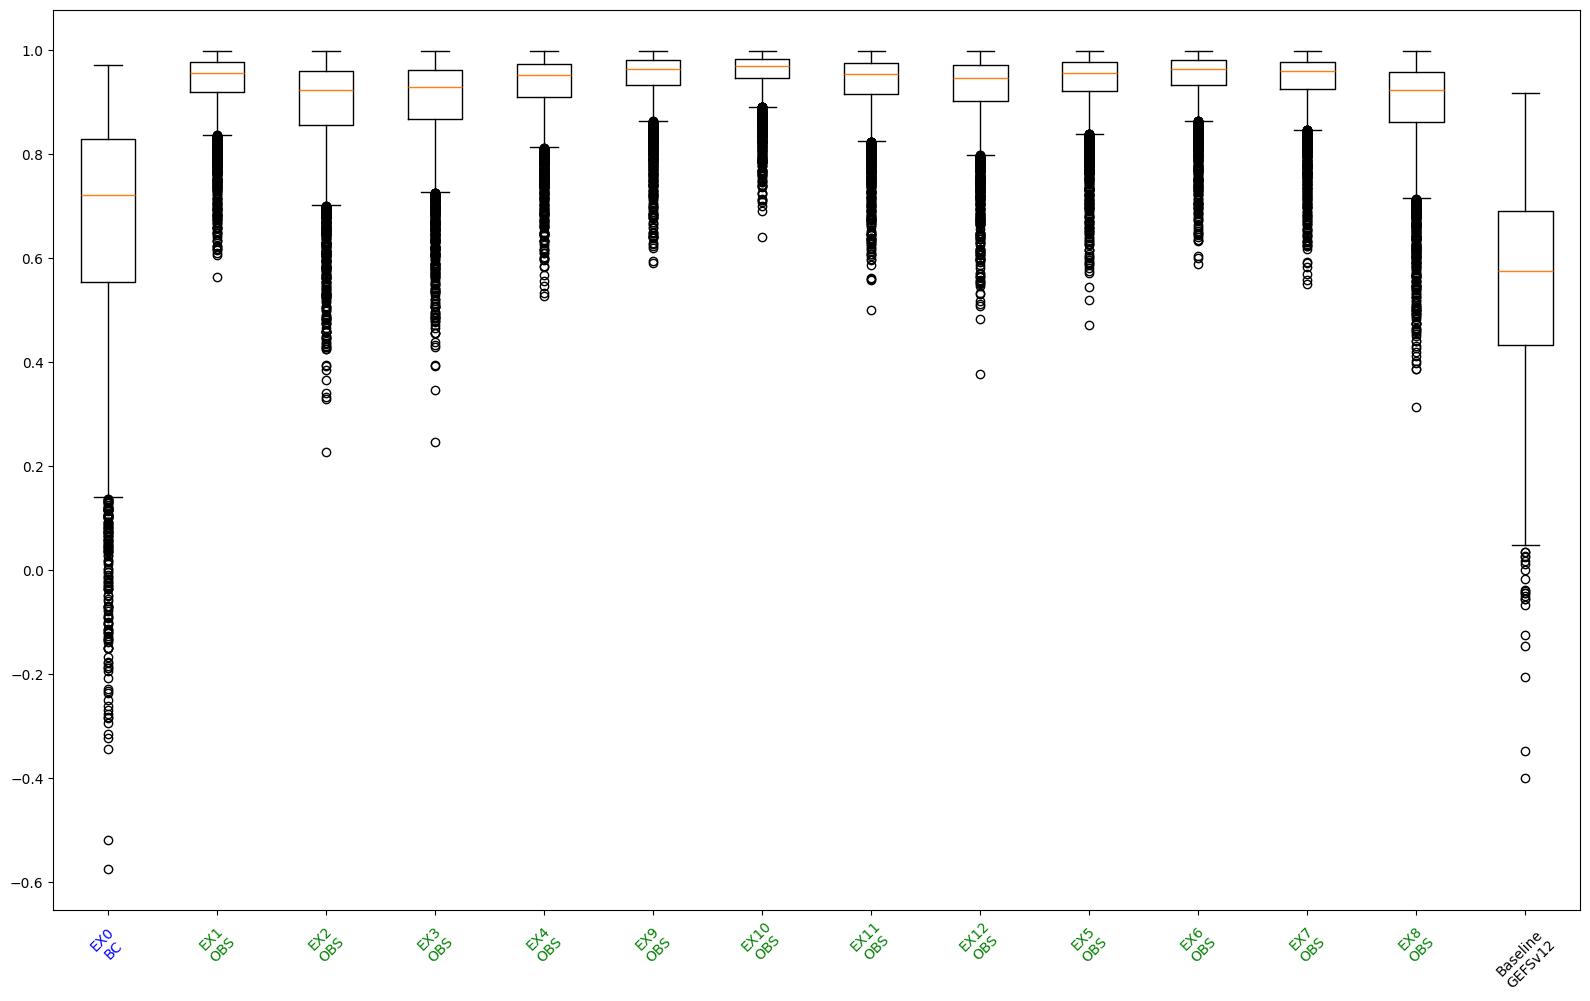

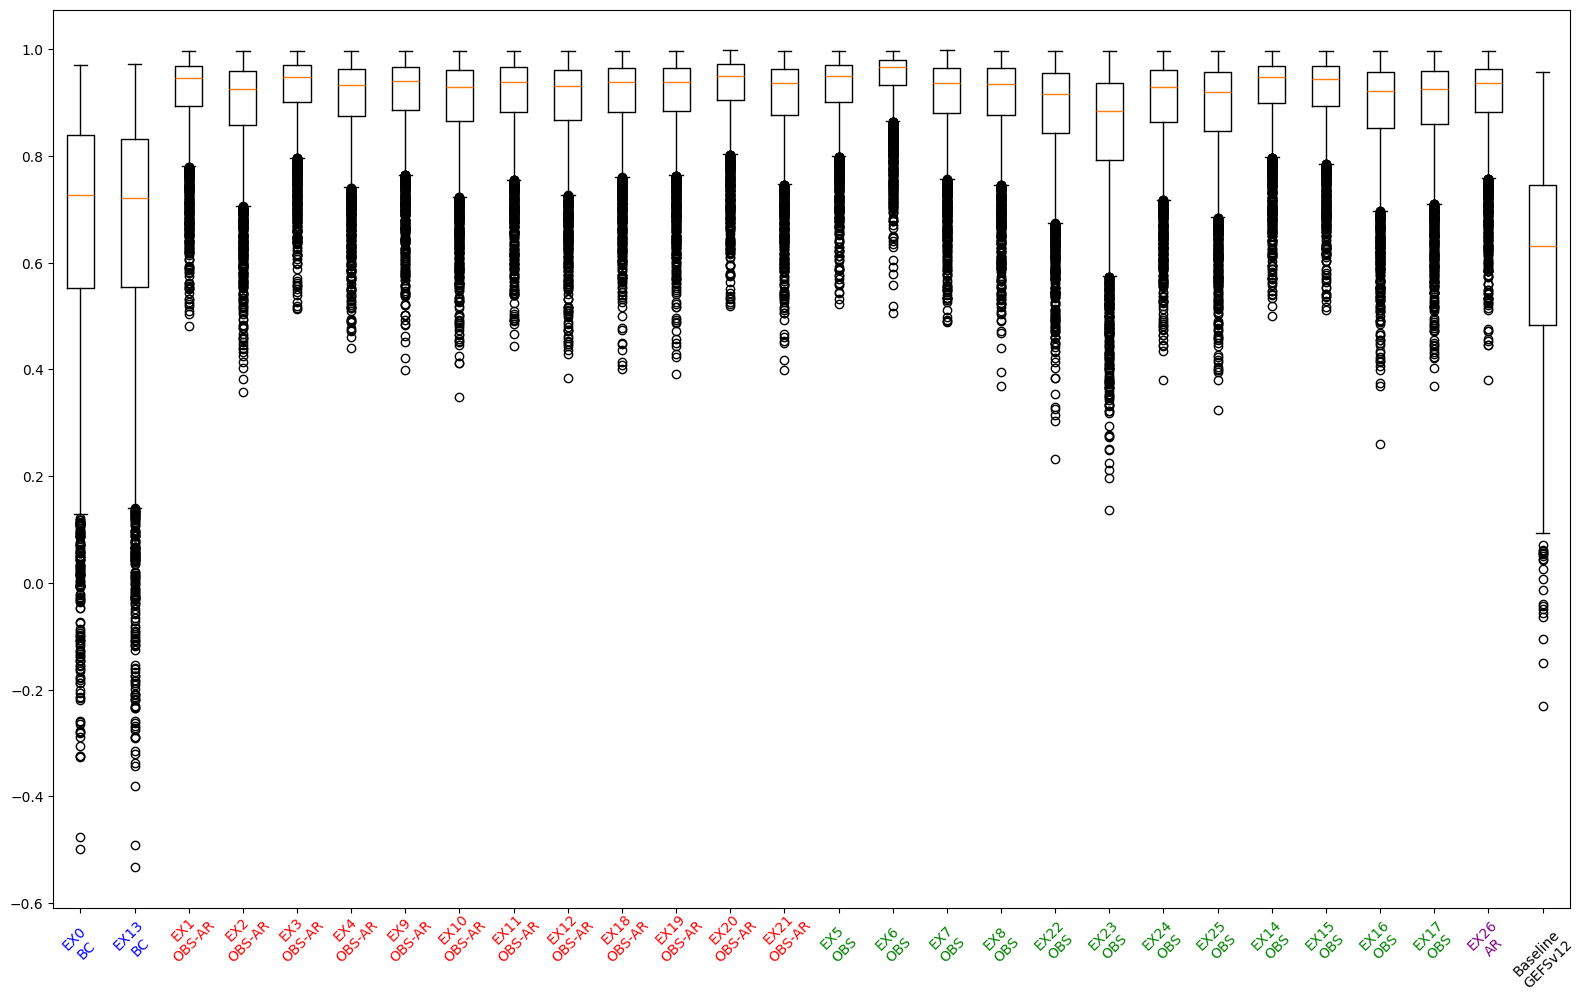

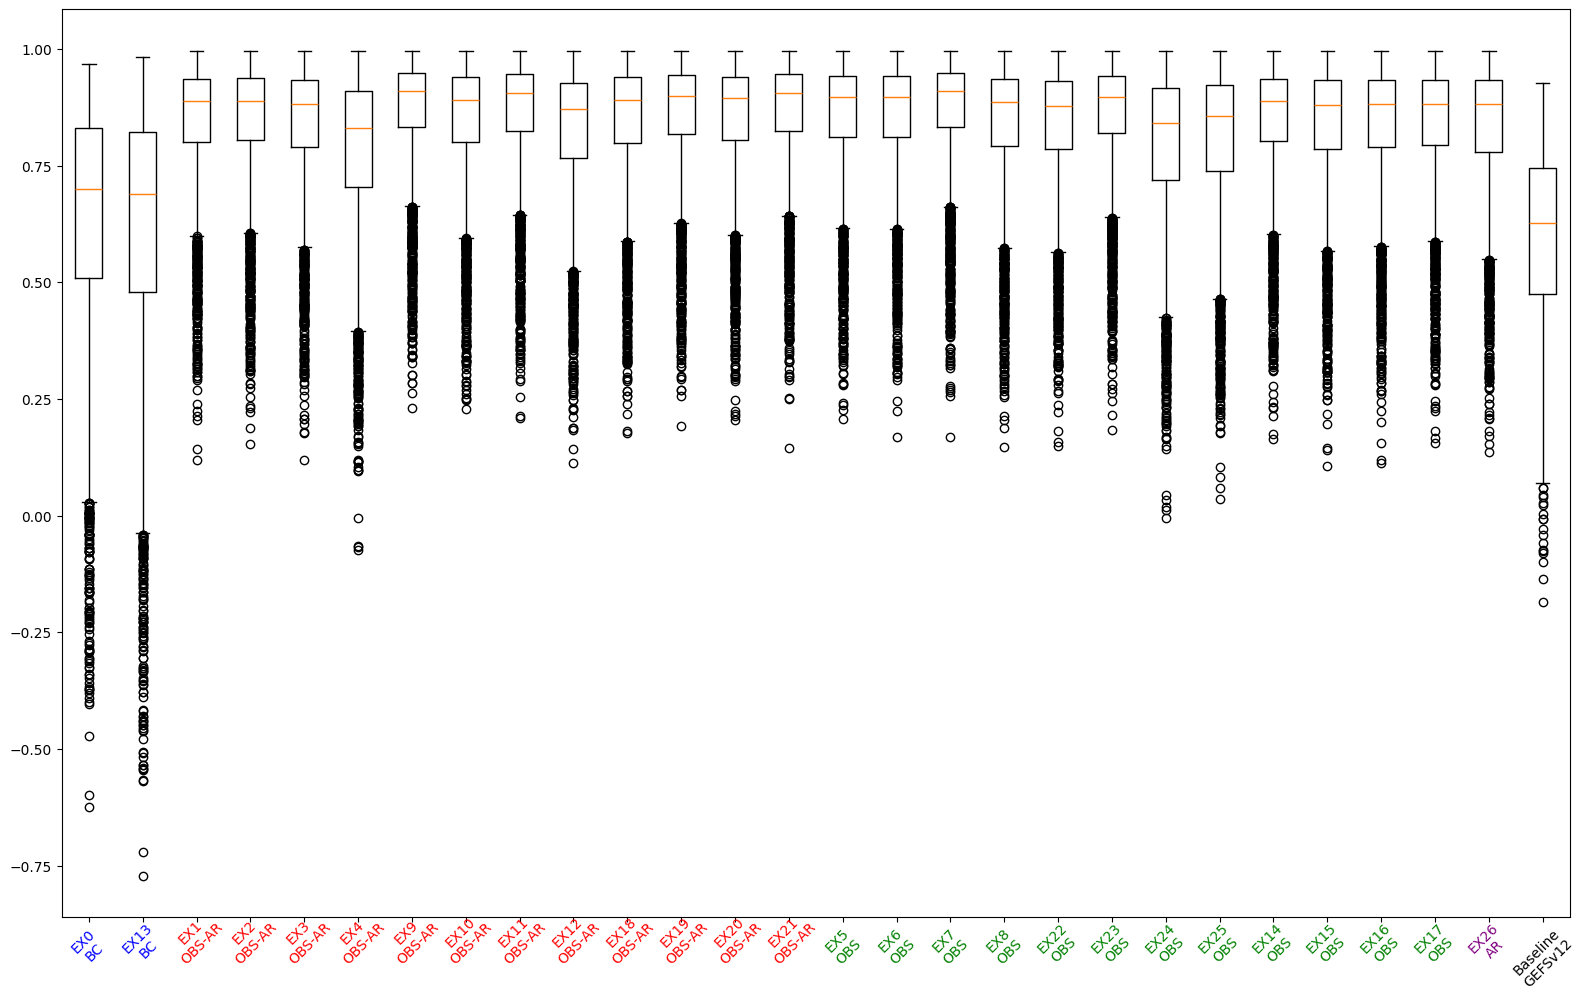

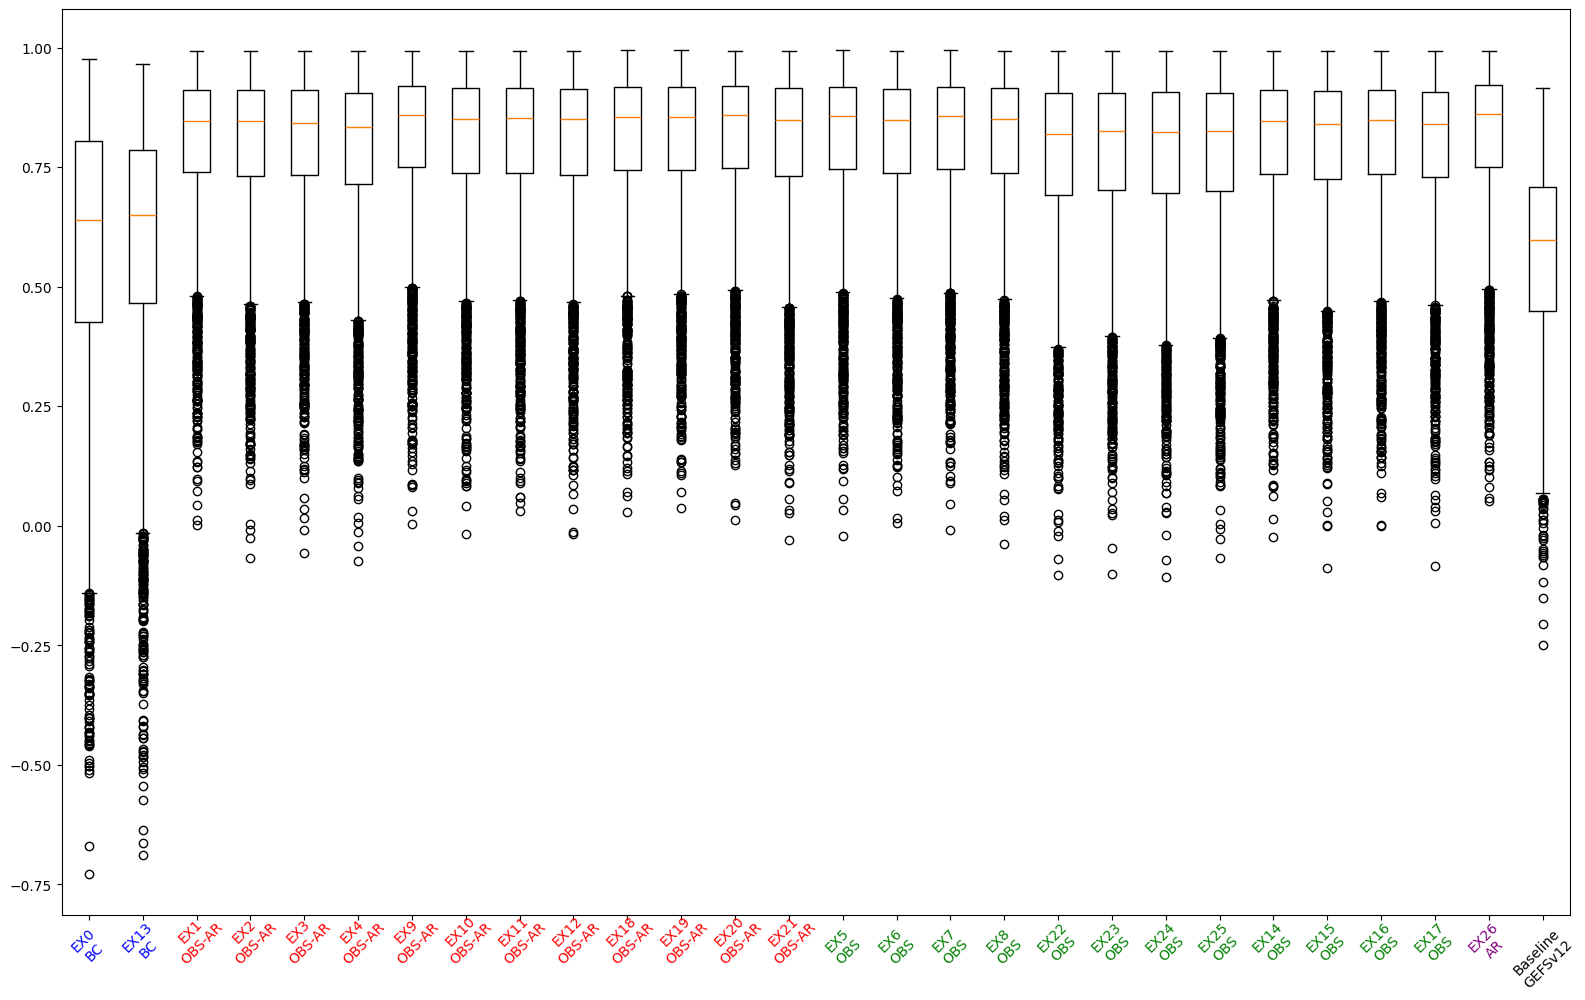

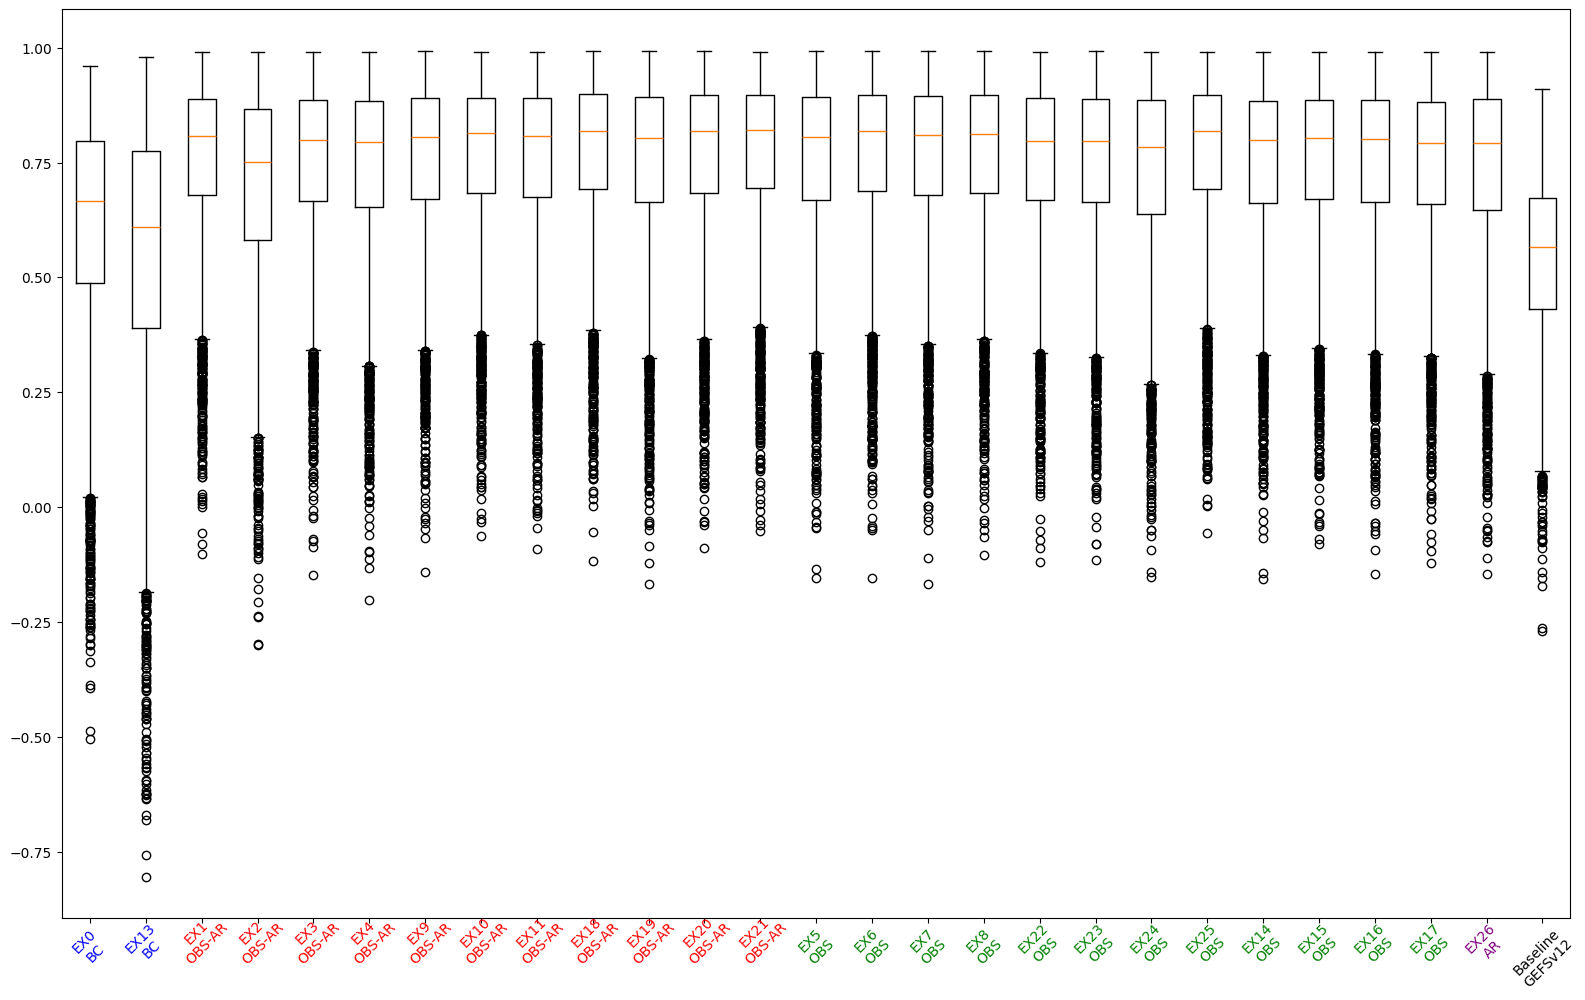

In [50]:

def plot_only_ACC_box_whisker(lead):

    # def plot_lead_experiment_type_ACC_value_also(lead):
    permuation_dir = f'Outputs/permutation_tests/Wk_{lead}'

    file_list = glob(f'{permuation_dir}/*RZSM.csv')

    #Make list of channel names and experiments
    channels,experiment_names = unique_channels(file_list)

    mean_ACC = load_ACC_files_all_values(lead,permuation_dir)
    

    if lead == 0:
        column_order = ['EX0','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX12','EX5','EX6','EX7','EX8']
        #For plotting
        tick_labels1 = [f'{i}\nBC' for i in column_order[0:1]]
        #Set colors
        color1 = {k:'blue' for k in tick_labels1}

        tick_labels2 = [f'{i}\nOBS' for i in column_order[1:]]
        color2 = {k:'green' for k in tick_labels2}

        tick_labels = tick_labels1+tick_labels2
        tick_labels = tick_labels + ['Baseline\nGEFSv12']
        #combine color dictionaries
        color1.update(color2)
        color1.update({tick_labels[-1]:'black'})


        column_order = [f'{i}_RZSM' for i in column_order]
        column_order.append('Baseline_fcst')

    elif lead in [1,2,3]:
        column_order = ['EX0','EX13','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX12','EX18','EX19','EX20','EX21','EX5','EX6','EX7','EX8','EX22','EX23','EX24','EX25','EX14','EX15','EX16','EX17','EX26']
        #For plotting
        tick_labels1 = [f'{i}\nBC' for i in column_order[0:2]]
        color1 = {k:'blue' for k in tick_labels1}

        tick_labels2 = [f'{i}\nOBS-AR' for i in column_order[2:14]]
        color1.update({k:'red' for k in tick_labels2})

        tick_labels3 = [f'{i}\nOBS' for i in column_order[14:26]]
        color1.update({k:'green' for k in tick_labels3})

        tick_labels4 = [f'{column_order[-1]}\nAR']
        color1.update({k:'purple' for k in tick_labels4})

        tick_labels = tick_labels1+tick_labels2+tick_labels3+tick_labels4
        tick_labels = tick_labels + ['Baseline\nGEFSv12']
        color1.update({tick_labels[-1]:'black'})

        column_order = [f'{i}_RZSM' for i in column_order]
        column_order.append('Baseline_fcst')

    elif lead == 4:
        # We don't have an experiment 12
        column_order = ['EX0','EX13','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX18','EX19','EX20','EX21','EX5','EX6','EX7','EX8','EX22','EX23','EX24','EX25','EX14','EX15','EX16','EX17','EX26']
        #For plotting
        tick_labels1 = [f'{i}\nBC' for i in column_order[0:2]]
        color1 = {k:'blue' for k in tick_labels1}

        tick_labels2 = [f'{i}\nOBS-AR' for i in column_order[2:13]]
        color1.update({k:'red' for k in tick_labels2})

        tick_labels3 = [f'{i}\nOBS' for i in column_order[13:25]]
        color1.update({k:'green' for k in tick_labels3})

        tick_labels4 = [f'{column_order[-1]}\nAR']
        color1.update({k:'purple' for k in tick_labels4})

        tick_labels = tick_labels1+tick_labels2+tick_labels3+tick_labels4
        tick_labels = tick_labels + ['Baseline\nGEFSv12']
        color1.update({tick_labels[-1]:'black'})

        column_order = [f'{i}_RZSM' for i in column_order]
        column_order.append('Baseline_fcst')

        
    #Flatten values
    new_dict = {k:i.flatten() for k,i in mean_ACC.items()}

    #remove np.nan values
    cleaned_data = {key: [value for value in values if not np.isnan(value)] for key, values in new_dict.items()}
    
    #sort by column order
    final_data = {}
    for i in column_order:
        final_data[i] = cleaned_data[i]
    
    #Get the actual values
    values = list(final_data.values())
    

    # Flatten the DataFrame for scatter plot
    fig = plt.subplots(figsize=(16, 10))

    # Create a box and whisker plot
    plt.boxplot(values, labels=final_data.keys())
    # Set the x-axis labels and colors
    plt.xticks(visible=False)
    # Set x-axis ticks as small lines
    # plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, length=20)

    base_drop = 0.15
    cat_drop = 0.1


    for i, category in enumerate(tick_labels):
        # break
        if category == 'Baseline\nGEFSv12':
            plt.text(i+1 , plt.ylim()[0] - base_drop, category, color=color1.get(category, 'black'), rotation=45, ha='center')
        else:
            plt.text(i+1 , plt.ylim()[0] - cat_drop, category, color=color1.get(category, 'black'), rotation=45, ha='center')


    plt.tight_layout()
    plt.savefig(f'Outputs/permutation_tests/Wk_{lead}_ACC_box_whisker.png')

    plt.show()
    
    
    return(0)

for lead in [0,1,2,3,4]:
# for lead in [1]:
    plot_only_ACC_box_whisker(lead=lead)
    

In [3]:
def load_CRPS_files_all_values(lead,permuation_dir):
    # Open the file in binary read mode ('rb') and use pickle.load() to load the dictionary
    ACC_path = f'{permuation_dir}/CRPS_vals.pkl'
    with open(ACC_path, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    #Take the mean of each experiment
    out_mean = {}
    for ex in list(loaded_dict.keys()):
        # break
        #Get name of each EX
        sp = ex.split('_')
        name = f'{sp[1]}_{sp[3]}'
        out_mean[name] = loaded_dict[ex]
    
    #rename baseline reforecast
    # Specify the key to be renamed
    old_key = 'MEM_RZSM'
    new_key = 'Baseline_fcst'

    # Create a new key-value pair with the desired key
    out_mean[new_key] = out_mean.pop(old_key)
    out_mean
    
    return(out_mean)

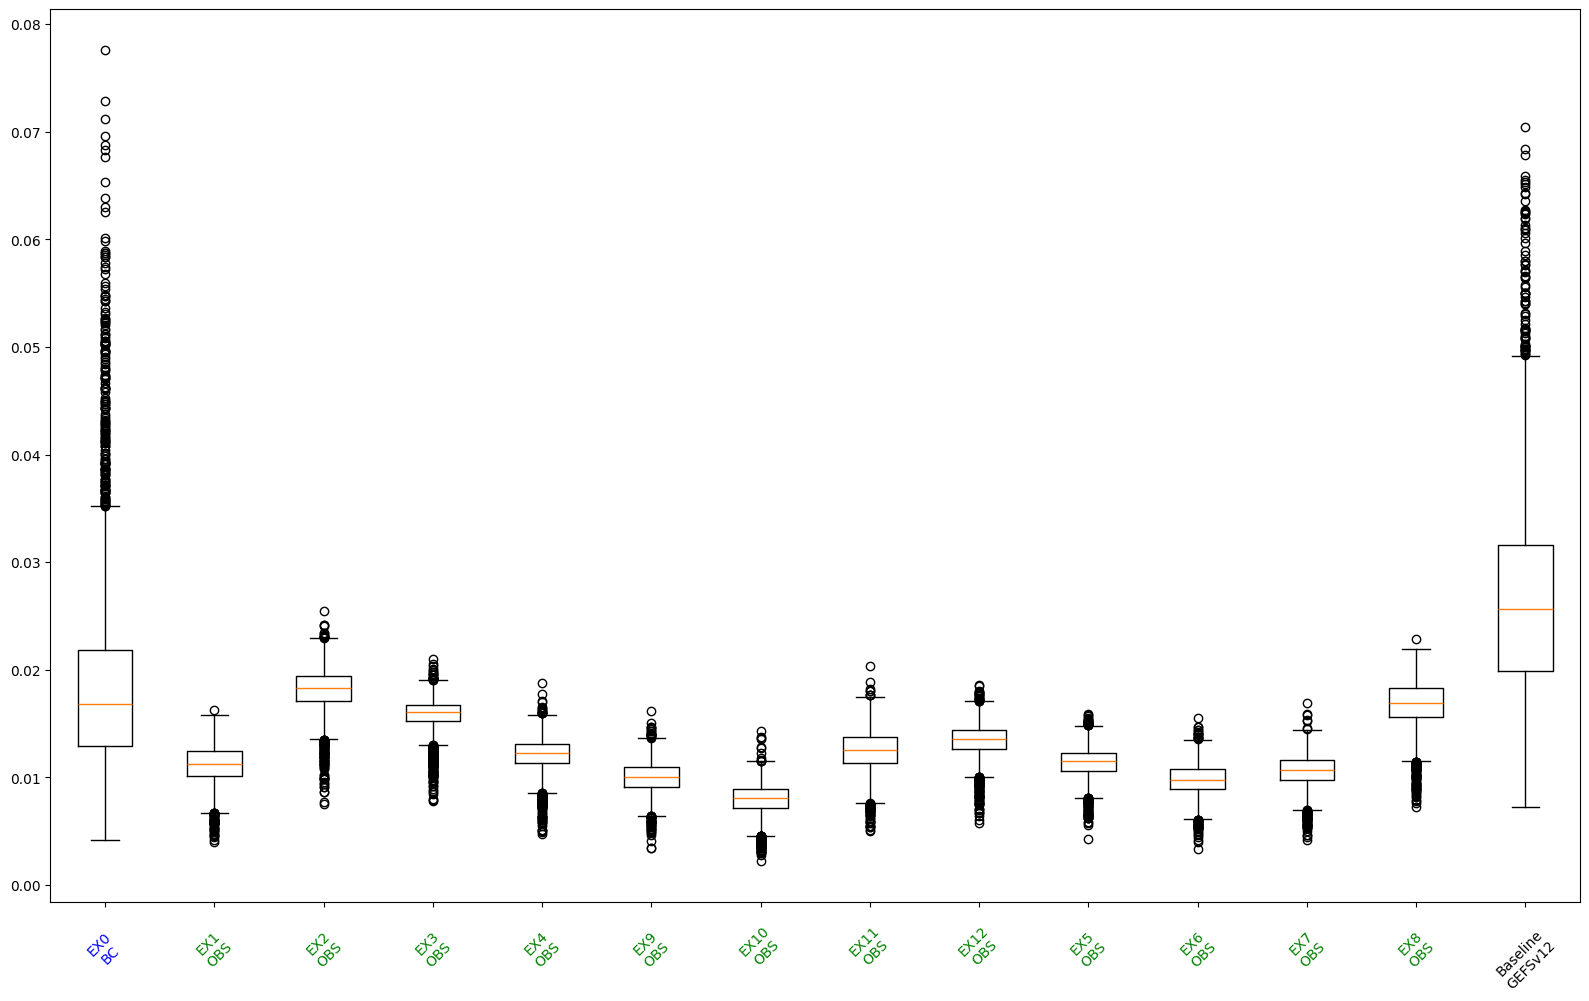

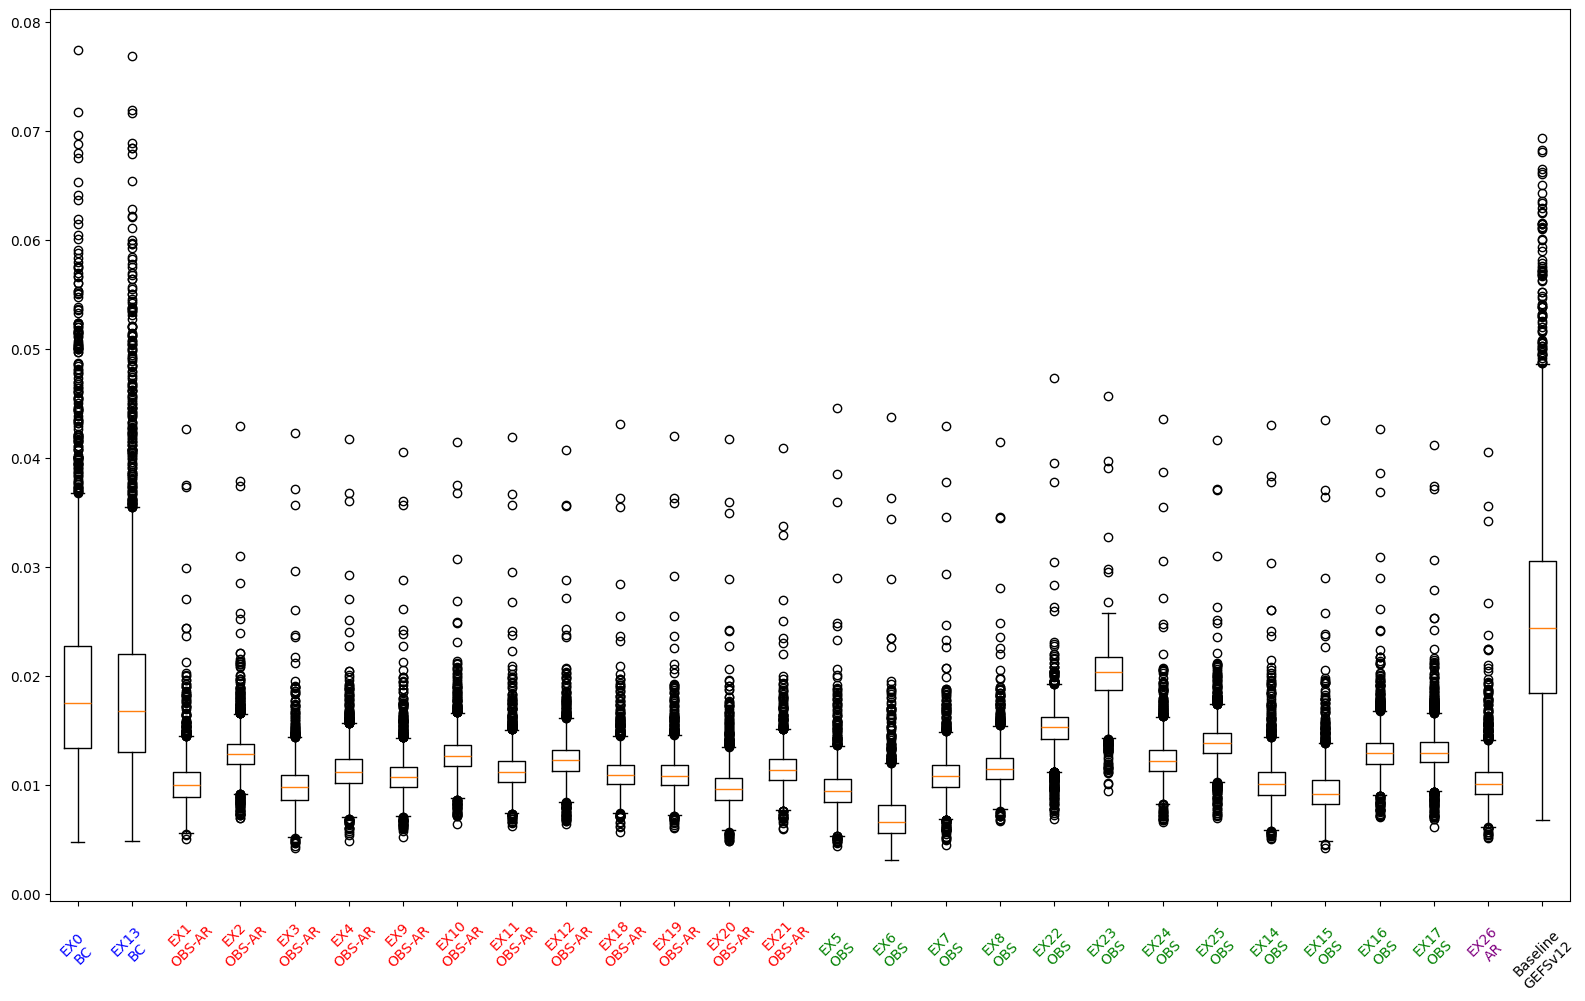

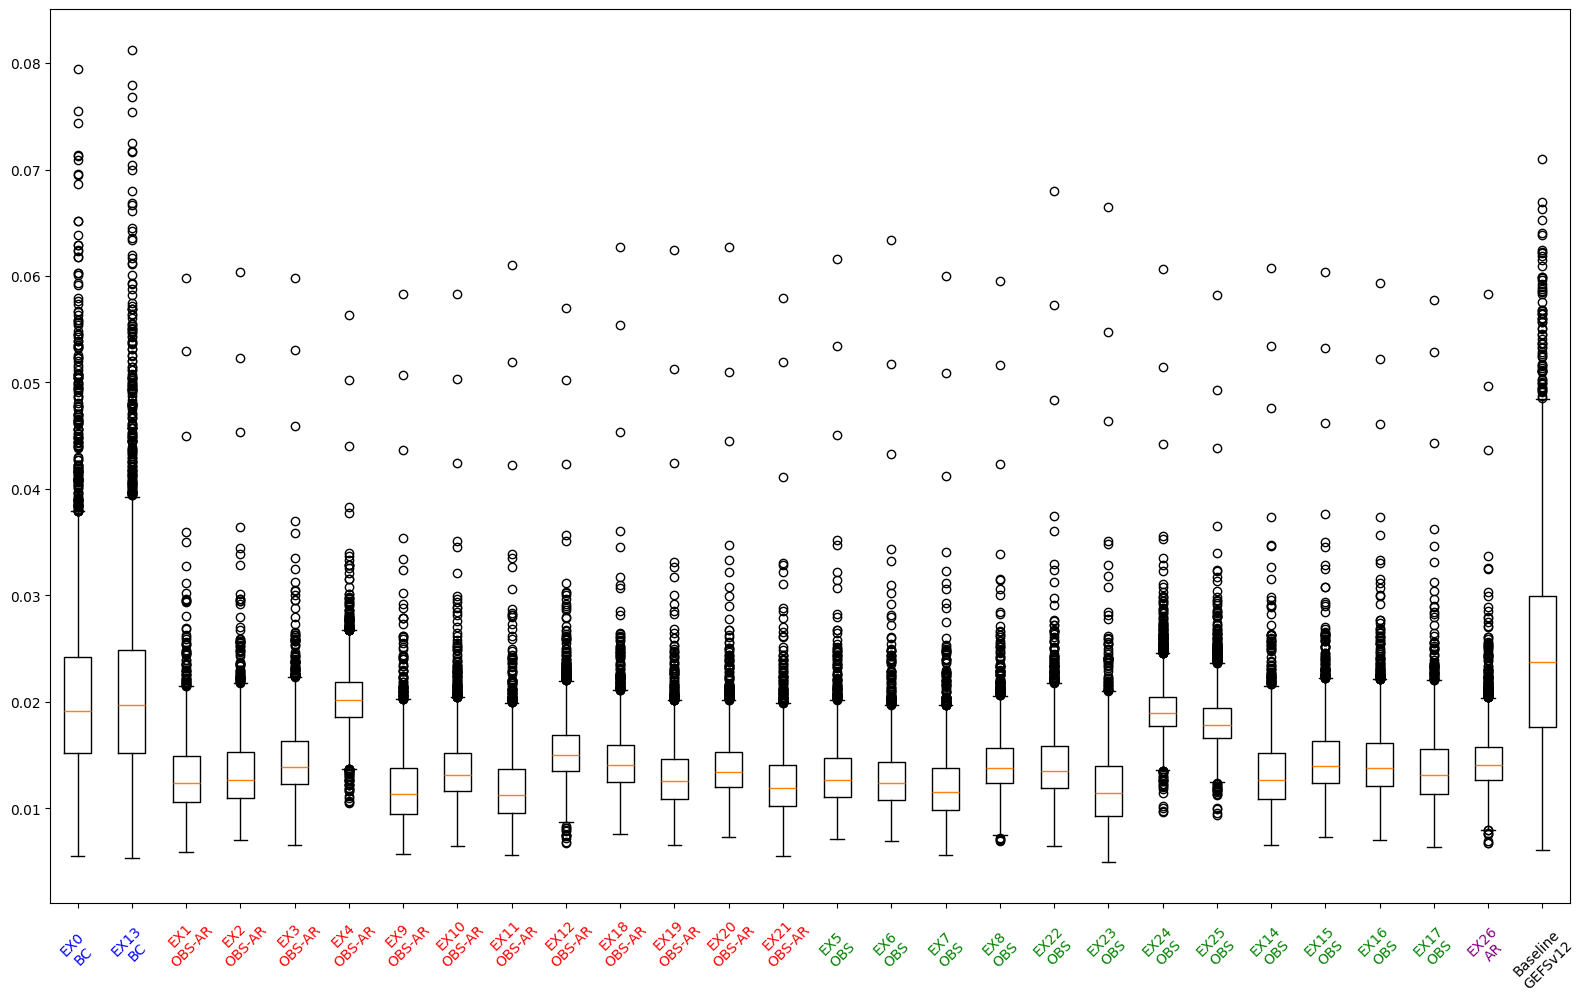

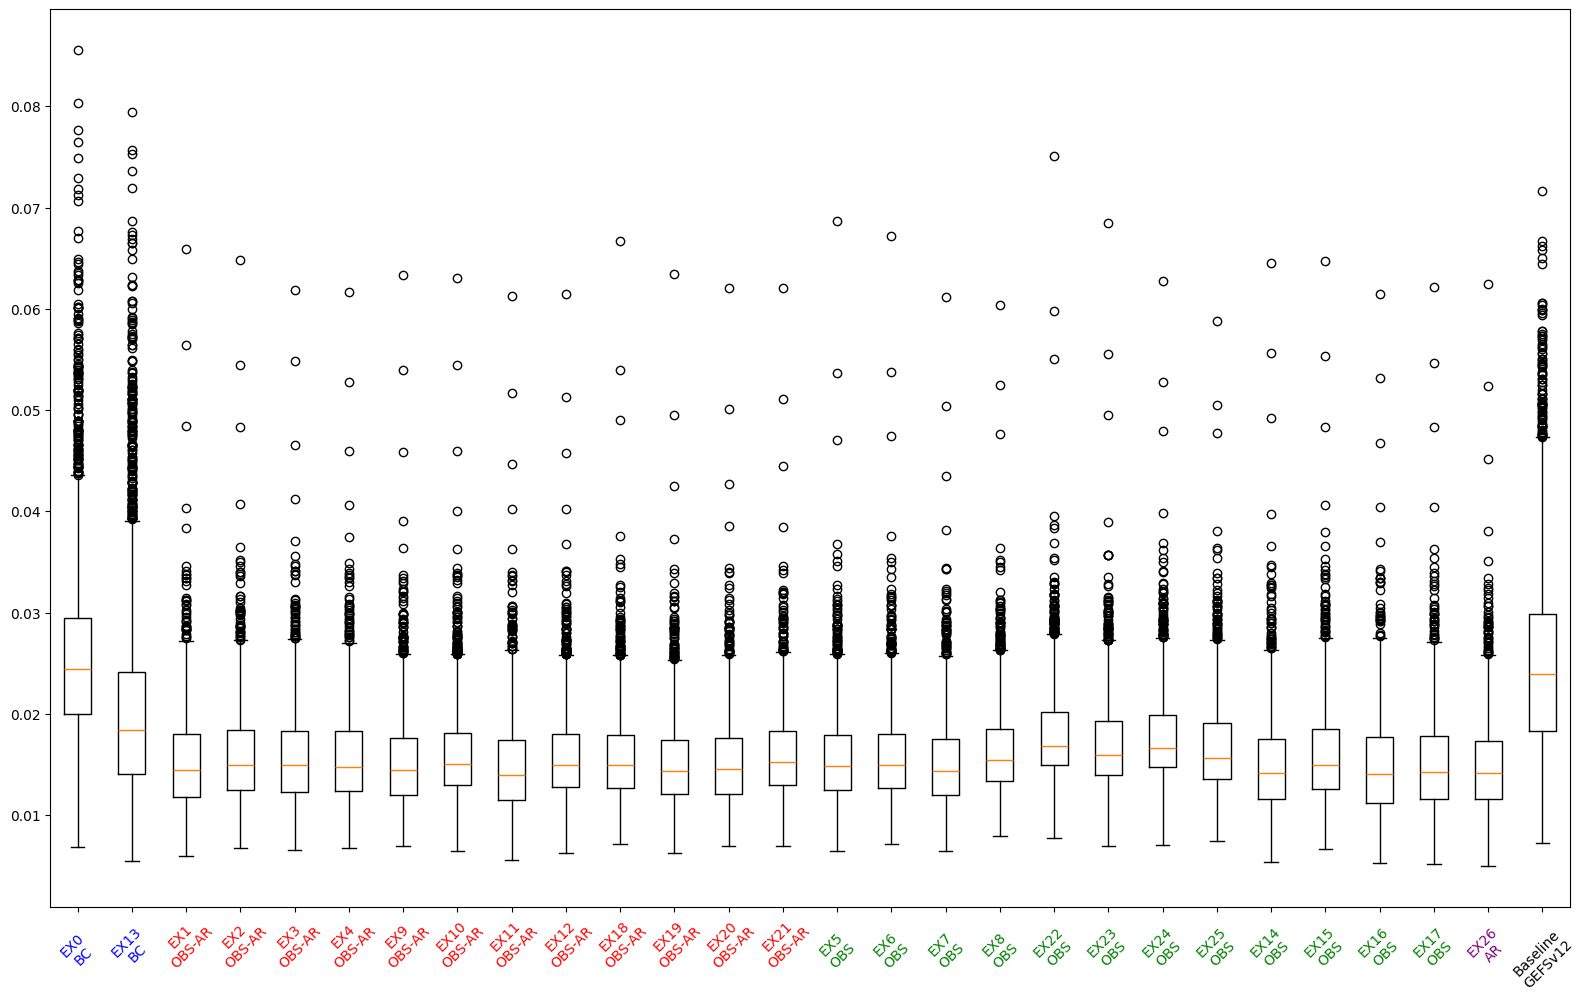

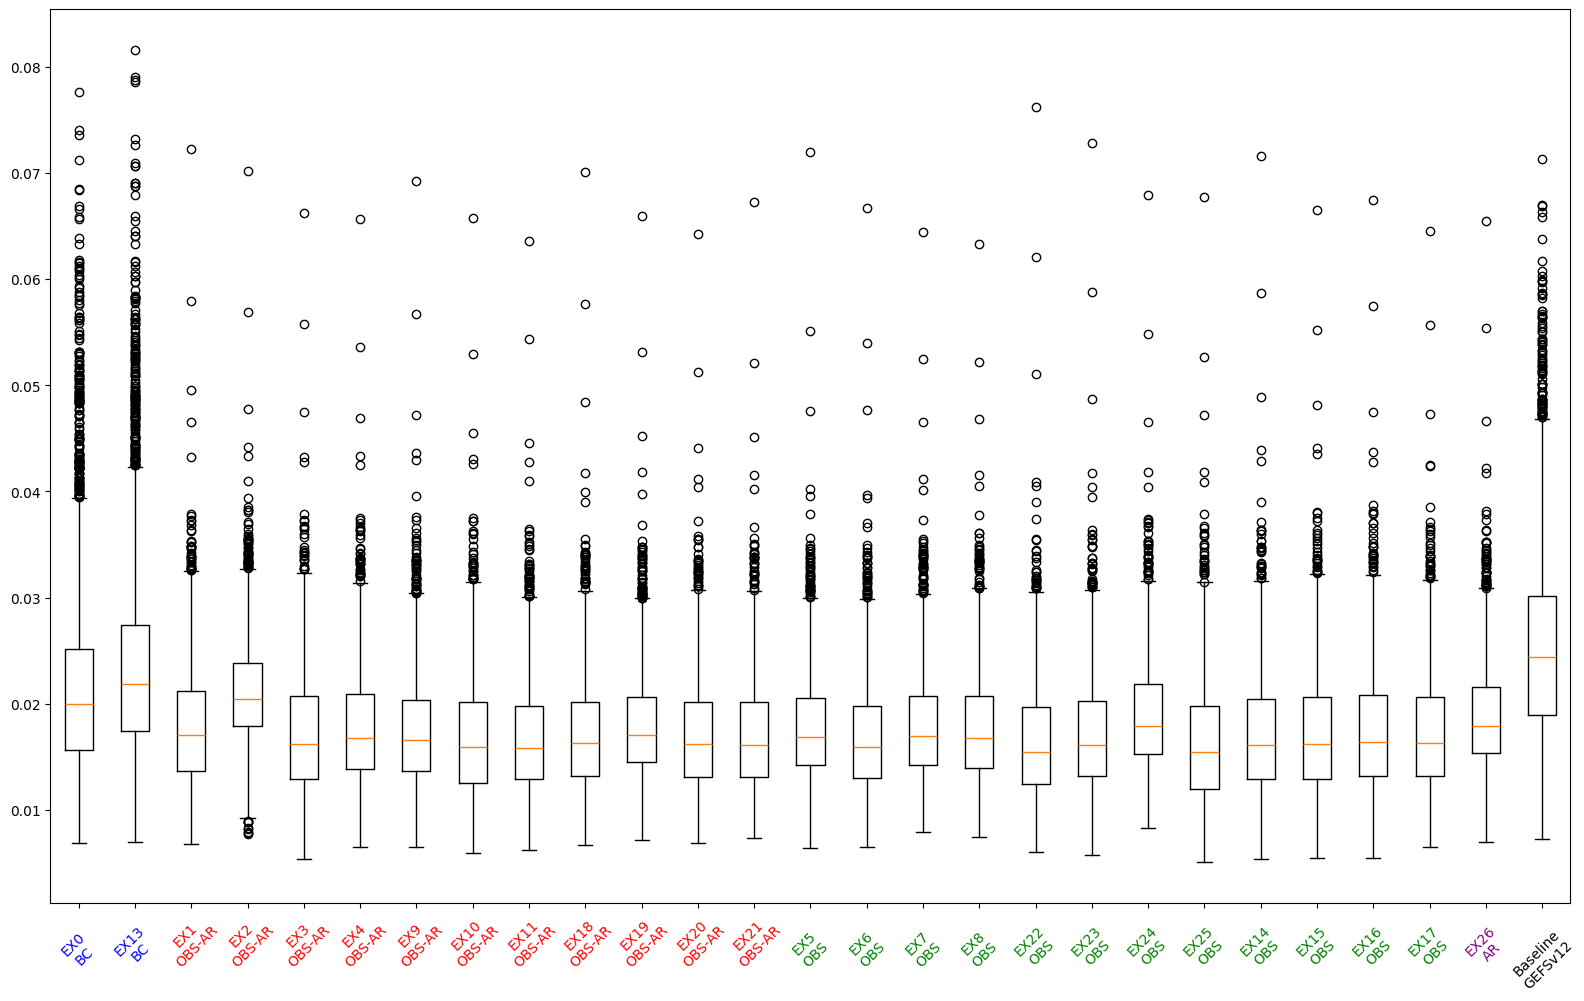

In [31]:

def plot_only_CRPS_box_whisker(lead):

    # def plot_lead_experiment_type_ACC_value_also(lead):
    permuation_dir = f'Outputs/permutation_tests/Wk_{lead}'

    file_list = glob(f'{permuation_dir}/*RZSM.csv')

    #Make list of channel names and experiments
    channels,experiment_names = unique_channels(file_list)

    mean_ACC = load_CRPS_files_all_values(lead,permuation_dir)
    

    if lead == 0:
        column_order = ['EX0','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX12','EX5','EX6','EX7','EX8']
        #For plotting
        tick_labels1 = [f'{i}\nBC' for i in column_order[0:1]]
        #Set colors
        color1 = {k:'blue' for k in tick_labels1}

        tick_labels2 = [f'{i}\nOBS' for i in column_order[1:]]
        color2 = {k:'green' for k in tick_labels2}

        tick_labels = tick_labels1+tick_labels2
        tick_labels = tick_labels + ['Baseline\nGEFSv12']
        #combine color dictionaries
        color1.update(color2)
        color1.update({tick_labels[-1]:'black'})


        column_order = [f'{i}_RZSM' for i in column_order]
        column_order.append('Baseline_fcst')

    elif lead in [1,2,3]:
        column_order = ['EX0','EX13','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX12','EX18','EX19','EX20','EX21','EX5','EX6','EX7','EX8','EX22','EX23','EX24','EX25','EX14','EX15','EX16','EX17','EX26']
        #For plotting
        tick_labels1 = [f'{i}\nBC' for i in column_order[0:2]]
        color1 = {k:'blue' for k in tick_labels1}

        tick_labels2 = [f'{i}\nOBS-AR' for i in column_order[2:14]]
        color1.update({k:'red' for k in tick_labels2})

        tick_labels3 = [f'{i}\nOBS' for i in column_order[14:26]]
        color1.update({k:'green' for k in tick_labels3})

        tick_labels4 = [f'{column_order[-1]}\nAR']
        color1.update({k:'purple' for k in tick_labels4})

        tick_labels = tick_labels1+tick_labels2+tick_labels3+tick_labels4
        tick_labels = tick_labels + ['Baseline\nGEFSv12']
        color1.update({tick_labels[-1]:'black'})

        column_order = [f'{i}_RZSM' for i in column_order]
        column_order.append('Baseline_fcst')

    elif lead == 4:
        # We don't have an experiment 12
        column_order = ['EX0','EX13','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX18','EX19','EX20','EX21','EX5','EX6','EX7','EX8','EX22','EX23','EX24','EX25','EX14','EX15','EX16','EX17','EX26']
        #For plotting
        tick_labels1 = [f'{i}\nBC' for i in column_order[0:2]]
        color1 = {k:'blue' for k in tick_labels1}

        tick_labels2 = [f'{i}\nOBS-AR' for i in column_order[2:13]]
        color1.update({k:'red' for k in tick_labels2})

        tick_labels3 = [f'{i}\nOBS' for i in column_order[13:25]]
        color1.update({k:'green' for k in tick_labels3})

        tick_labels4 = [f'{column_order[-1]}\nAR']
        color1.update({k:'purple' for k in tick_labels4})

        tick_labels = tick_labels1+tick_labels2+tick_labels3+tick_labels4
        tick_labels = tick_labels + ['Baseline\nGEFSv12']
        color1.update({tick_labels[-1]:'black'})

        column_order = [f'{i}_RZSM' for i in column_order]
        column_order.append('Baseline_fcst')

        
    #Flatten values
    new_dict = {k:i.flatten() for k,i in mean_ACC.items()}

    #remove np.nan values
    cleaned_data = {key: [value for value in values if not np.isnan(value)] for key, values in new_dict.items()}
    
    #sort by column order
    final_data = {}
    for i in column_order:
        final_data[i] = cleaned_data[i]
    
    #Get the actual values
    values = list(final_data.values())
    

    # Flatten the DataFrame for scatter plot
    fig = plt.subplots(figsize=(16, 10))

    # Create a box and whisker plot
    plt.boxplot(values, labels=final_data.keys())
    # Set the x-axis labels and colors
    plt.xticks(visible=False)
    # Set x-axis ticks as small lines
    # plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, length=20)

    base_drop = 0.008
    cat_drop = 0.006


    for i, category in enumerate(tick_labels):
        # break
        if category == 'Baseline\nGEFSv12':
            plt.text(i+1 , plt.ylim()[0] - base_drop, category, color=color1.get(category, 'black'), rotation=45, ha='center')
        else:
            plt.text(i+1 , plt.ylim()[0] - cat_drop, category, color=color1.get(category, 'black'), rotation=45, ha='center')


    plt.tight_layout()
    plt.savefig(f'Outputs/permutation_tests/Wk_{lead}_CRPS_box_whisker.png')

    plt.show()
    
    
    return(0)

for lead in [0,1,2,3,4]:
# for lead in [1]:
    plot_only_CRPS_box_whisker(lead=lead)
    

In [ ]:
#Old code to test previous plot

# def plot_lead_experiment_type_ACC_value_also(lead):
permuation_dir = f'Outputs/permutation_tests/Wk_{lead}'

file_list = glob(f'{permuation_dir}/*RZSM.csv')

#Make list of channel names and experiments
channels,experiment_names = unique_channels(file_list)

channels =  channel_list_recreate(channels)

mean_ACC = load_ACC_files_make_mean(lead,permuation_dir)

channels = channels+['ACC']

# Create a blank DataFrame with the specified dimensions
blank_df = pd.DataFrame(index=channels, columns=experiment_names)

#Set up within a csv file for plotting
filled_df = create_pd_dataset(blank_df, file_list)


filled_df['Baseline_fcst'] = np.nan


if lead == 0:
    column_order = ['EX0','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX12','EX5','EX6','EX7','EX8']
    #For plotting
    tick_labels1 = [f'{i}\nBC' for i in column_order[0:1]]
    #Set colors
    color1 = {k:'blue' for k in tick_labels1}
    
    tick_labels2 = [f'{i}\nOBS' for i in column_order[1:]]
    color2 = {k:'green' for k in tick_labels2}
    
    tick_labels = tick_labels1+tick_labels2
    tick_labels = tick_labels + ['Baseline\nGEFSv12']
    #combine color dictionaries
    color1.update(color2)
    color1.update({tick_labels[-1]:'black'})

    
    column_order = [f'{i}_RZSM' for i in column_order]
    column_order.append('Baseline_fcst')

elif lead in [1,2,3]:
    column_order = ['EX0','EX13','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX12','EX18','EX19','EX20','EX21','EX5','EX6','EX7','EX8','EX22','EX23','EX24','EX25','EX14','EX15','EX16','EX17','EX26']
    #For plotting
    tick_labels1 = [f'{i}\nBC' for i in column_order[0:2]]
    color1 = {k:'blue' for k in tick_labels1}
    
    tick_labels2 = [f'{i}\nOBS-AR' for i in column_order[2:14]]
    color1.update({k:'red' for k in tick_labels2})
    
    tick_labels3 = [f'{i}\nOBS' for i in column_order[14:26]]
    color1.update({k:'green' for k in tick_labels3})
    
    tick_labels4 = [f'{column_order[-1]}\nAR']
    color1.update({k:'purple' for k in tick_labels4})

    tick_labels = tick_labels1+tick_labels2+tick_labels3+tick_labels4
    tick_labels = tick_labels + ['Baseline\nGEFSv12']
    color1.update({tick_labels[-1]:'black'})
    
    column_order = [f'{i}_RZSM' for i in column_order]
    column_order.append('Baseline_fcst')
    
elif lead == 4:
    # We don't have an experiment 12
    column_order = ['EX0','EX13','EX1','EX2','EX3','EX4','EX9','EX10','EX11','EX18','EX19','EX20','EX21','EX5','EX6','EX7','EX8','EX22','EX23','EX24','EX25','EX14','EX15','EX16','EX17','EX26']
    #For plotting
    tick_labels1 = [f'{i}\nBC' for i in column_order[0:2]]
    color1 = {k:'blue' for k in tick_labels1}
    
    tick_labels2 = [f'{i}\nOBS-AR' for i in column_order[2:13]]
    color1.update({k:'red' for k in tick_labels2})
    
    tick_labels3 = [f'{i}\nOBS' for i in column_order[13:25]]
    color1.update({k:'green' for k in tick_labels3})
    
    tick_labels4 = [f'{column_order[-1]}\nAR']
    color1.update({k:'purple' for k in tick_labels4})

    tick_labels = tick_labels1+tick_labels2+tick_labels3+tick_labels4
    tick_labels = tick_labels + ['Baseline\nGEFSv12']
    color1.update({tick_labels[-1]:'black'})
    
    column_order = [f'{i}_RZSM' for i in column_order]
    column_order.append('Baseline_fcst')
    
#Re-order by column
filled_df = filled_df[column_order]

# Replace all non-NaN values with 1
filled_df = filled_df.applymap(lambda x: 1 if pd.notna(x) else x)

#Now add ACC values
for k,v in (mean_ACC.items()):
    # break
    filled_df.loc['ACC',k] = v

acc_row = filled_df.iloc[-1,:]

#Use for plotting
len_experiment = len(experiment_names)

col_names = filled_df.columns

# Flatten the DataFrame for scatter plot
fig, ax1 = plt.subplots(figsize=(16, 10))
x_values = np.tile(filled_df.columns, len(channels[:-1]))
y_values = np.repeat(channels[:-1], len(filled_df.columns))
colors = filled_df[:-1].values.flatten()

print(f'X: {len(x_values)}')
print(f'Y: {len(y_values)}')
print(f'C: {len(colors)}')

# Plot the scatter plot
scatter=ax1.scatter(x=x_values, y=y_values, c=colors, cmap='tab20c_r', marker='s',s=350)
# Set the x-axis labels and colors
ax1.set_xticklabels('', rotation=45, ha='center')

if lead in [1,2,3]:
    base_drop = 2.5
    cat_drop = 2.3
elif lead == 0:
    base_drop = 2
    cat_drop = 1.7
elif lead == 4:
    base_drop = 2.8
    cat_drop = 2.5

for i, category in enumerate(tick_labels):
    # break
    if category == 'Baseline\nGEFSv12':
        plt.text(i , plt.ylim()[0] - base_drop, category, color=color1.get(category, 'black'), rotation=45, ha='center')
    else:
        plt.text(i , plt.ylim()[0] - cat_drop, category, color=color1.get(category, 'black'), rotation=45, ha='center')



# Draw lines connecting each point to the x-axis
for i, (xi, yi) in enumerate(zip(x_values, y_values)):
    plt.hlines(yi, 0, xi, linestyle='dashed', color='gray', alpha=0.01)

# cbar = plt.colorbar(scatter, ax=ax1, label='MAE')

# Create a twin Axes for the second scatter plot
ax2 = ax1.twinx()
ax2.scatter(col_names, acc_row, marker='o', label='Scatter Plot 2', color='red')

ax2.set_title(f'Week {lead} UNET predictions\n Permutation and ACC values')

#     # Add a colorbar
#     ticks = np.linspace(np.nanmin(colors), np.nanmax(colors), num=20)


#     # Rotate x-axis labels for better readability
#     ax.set_xticklabels(sorted_columns.columns, rotation=45, ha='right')
plt.tight_layout()

plt.show()

    
    
#     return(0)

# # for lead in [0,1,2,3,4]:
# for lead in [1]:
#     plot_lead_experiment_type_ACC_value_also(lead=lead)
    

# Now get the best 5 ACC values from each Weeks model and plot together

In [ ]:
def unique_channels_top5(leads):
    all_channels = []
    experiment_names = []
    files_to_open_FULL = []
    return_ACC = {}
    for lead in leads:
        permuation_dir = f'Outputs/permutation_tests/Wk_{lead}'
        file_list = glob(f'{permuation_dir}/*RZSM.csv')
        
        top_5_keys,ACC_vals = load_ACC_files_make_mean_top_5(lead,permuation_dir)
        return_ACC.update(ACC_vals)
        #Now split the names of the files to open only the correct ones
        files_to_open = []
        for i in top_5_keys:
            for j in file_list:
                if i in j:
                    files_to_open.append(j)
                    files_to_open_FULL.append(j)
        
        
        for file in files_to_open:
            # break
            #First read the file and get all of the header information
            op = pd.read_csv(file,header=[0])
            col_names = op.columns
            [all_channels.append(i) for i in col_names[1:] if i not in all_channels]
            experiment_names.append(f'Wk{lead}_{file.split("/")[-1].split(".")[0]}')
        
    return(all_channels,experiment_names,files_to_open_FULL,return_ACC)





In [ ]:
def load_ACC_files_make_mean_top_5(lead,permuation_dir):
    # Open the file in binary read mode ('rb') and use pickle.load() to load the dictionary
    ACC_path = f'{permuation_dir}/ACC_vals.pkl'
    with open(ACC_path, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    #Take the mean of each experiment
    out_mean = {}
    for ex in list(loaded_dict.keys()):
        # break
        #Get name of each EX
        sp = ex.split('_')
        name = f'{sp[1]}_{sp[3]}'
        out_mean[name] = np.nanmean(loaded_dict[ex])
    
    #Get the top 5 keys
    top_5_keys = sorted(out_mean, key=lambda x: out_mean[x], reverse=True)[:5]
    
    ACC_vals = {}
    for i in top_5_keys:
        ACC_vals[f'Wk{lead}_{i}'] = out_mean[i]
    
    return(top_5_keys,ACC_vals)
    


In [ ]:
def create_pd_dataset(blank_df, file_list):
    for file in file_list:
        #get name of week lead
        lead = int(file.split('/')[2].split('_')[-1])
        
        # break
        col_name = file.split('/')[-1].split('.')[0]
        col_name = f'Wk{lead}_{col_name}'
        #First read the file and get all of the header information
        op = pd.read_csv(file,header=[0])
        col_names = op.columns[1:]
        #Now replace the data in the blank_df
        for i in col_names:
            # break
            blank_df.loc[i,col_name] = op[i][0]
            
    return(blank_df)

In [ ]:
lead=0

# Now we have the channels and experiment names for the top 5 from each set of weeks



In [ ]:

# def plot_lead_experiment_type_ACC_value_also(lead):

all_channels,experiment_names,files_to_open_FULL,return_ACC =  unique_channels_top5(leads=[0,1,2,3,4])

### Now we need to pre-sort the rows (channel names)
channels =  channel_list_recreate(all_channels)

# Create a blank DataFrame with the specified dimensions
blank_df = pd.DataFrame(index=channels, columns=experiment_names)

#Set up within a csv file for plotting
filled_df = create_pd_dataset(blank_df=blank_df, file_list=files_to_open_FULL)

column_order = filled_df.columns
column_order = [f'{i.split("_RZSM")[0]}' for i in column_order]

#For plotting
tick_labels1 = [f'{i}\nOBS' for i in column_order[0:6]]
#Set colors
color1 = {k:'green' for k in tick_labels1}


#Week 1
tick_labels1.append(f'Wk1_EX20\nOBS-AR')
color1.update({'Wk1_EX20\nOBS-AR':'red'})

tick_labels1.append(f'Wk1_EX5\nOBS')
color1.update({'Wk1_EX5\nOBS':'green'})

tick_labels1.append(f'Wk1_EX3\nOBS-AR')
color1.update({'Wk1_EX3\nOBS-AR':'red'})

tick_labels1.append(f'Wk1_EX14\nOBS')
color1.update({'Wk1_EX14\nOBS':'green'})

#Week 2
tick_labels1.append(f'Wk2_EX9\nOBS-AR')
color1.update({'Wk2_EX9\nOBS-AR':'red'})

tick_labels1.append(f'Wk2_EX7\nOBS')
color1.update({'Wk2_EX7\nOBS':'green'})

tick_labels1.append(f'Wk2_EX21\nOBS-AR')
color1.update({'Wk2_EX21\nOBS-AR':'red'})

tick_labels1.append(f'Wk2_EX11\nOBS-AR')
color1.update({'Wk2_EX11\nOBS-AR':'red'})

tick_labels1.append(f'Wk2_EX19\nOBS-AR')
color1.update({'Wk2_EX19\nOBS-AR':'red'})

#Week 3
tick_labels1.append(f'Wk3_EX26\nAR')
color1.update({'Wk3_EX26\nAR':'purple'})

tick_labels1.append(f'Wk3_EX9\nOBS-AR')
color1.update({'Wk3_EX9\nOBS-AR':'red'})

tick_labels1.append(f'Wk3_EX5\nOBS')
color1.update({'Wk3_EX5\nOBS':'green'})

tick_labels1.append(f'Wk3_EX20\nOBS-AR')
color1.update({'Wk3_EX20\nOBS-AR':'red'})

tick_labels1.append(f'Wk3_EX7\nOBS')
color1.update({'Wk3_EX7\nOBS':'green'})

#Week 4
tick_labels1.append(f'Wk4_EX21\nOBS-AR')
color1.update({'Wk4_EX21\nOBS-AR':'red'})

tick_labels1.append(f'Wk4_EX18\nOBS-AR')
color1.update({'Wk4_EX18\nOBS-AR':'red'})

tick_labels1.append(f'Wk4_EX25\nOBS')
color1.update({'Wk4_EX25\nOBS':'green'})

tick_labels1.append(f'Wk4_EX6\nOBS')
color1.update({'Wk4_EX6\nOBS':'green'})

tick_labels1.append(f'Wk4_EX10\nOBS-AR')
color1.update({'Wk4_EX10\nOBS-AR':'red'})


# Replace all non-NaN values with 1
filled_df = filled_df.applymap(lambda x: 1 if pd.notna(x) else x)

#Now add ACC values
for k,v in (return_ACC.items()):
    # break
    filled_df.loc['ACC',k] = v

acc_row = filled_df.iloc[-1,:]

#Use for plotting
len_experiment = len(experiment_names)

col_names = filled_df.columns

# Flatten the DataFrame for scatter plot
fig, ax1 = plt.subplots(figsize=(16, 10))
x_values = np.tile(filled_df.columns, len(channels))
y_values = np.repeat(channels, len(filled_df.columns))
colors = filled_df[:-1].values.flatten()

print(f'X: {len(x_values)}')
print(f'Y: {len(y_values)}')
print(f'C: {len(colors)}')

# Plot the scatter plot
scatter=ax1.scatter(x=x_values, y=y_values, c=colors, cmap='tab20c_r', marker='s',s=350)
# Set the x-axis labels and colors
ax1.set_xticklabels('', rotation=45, ha='center')


base_drop = 2.8
cat_drop = 3.5

for i, category in enumerate(tick_labels1):
    # break
    if category == 'Baseline\nGEFSv12':
        plt.text(i , plt.ylim()[0] - base_drop, category, color=color1.get(category, 'black'), rotation=45, ha='center')
    else:
        plt.text(i , plt.ylim()[0] - cat_drop, category, color=color1.get(category, 'black'), rotation=45, ha='center')

# Insert vertical lines between every 5th and 6th x-axis tick mark
for i, x_tick in enumerate(plt.xticks()[0]):
    if i % 5 == 0 and i > 0:
        plt.axvline(x=x_tick-0.5, color='blue', linestyle='--')


# Draw lines connecting each point to the x-axis
for i, (xi, yi) in enumerate(zip(x_values, y_values)):
    plt.hlines(yi, 0, xi, linestyle='dashed', color='gray', alpha=0.01)

# cbar = plt.colorbar(scatter, ax=ax1, label='MAE')

# Create a twin Axes for the second scatter plot
ax2 = ax1.twinx()
ax2.scatter(col_names, acc_row, marker='o', label='Scatter Plot 2', color='red')

ax2.set_title(f'Week {lead} UNET predictions\n Permutation and ACC values')

#     # Add a colorbar
#     ticks = np.linspace(np.nanmin(colors), np.nanmax(colors), num=20)


#     # Rotate x-axis labels for better readability
#     ax.set_xticklabels(sorted_columns.columns, rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'Outputs/permutation_tests/ALL_WEEK_TOP5_scatterplots.png')

plt.show()


# return(0)

# for lead in [0,1,2,3,4]:
# # for lead in [1]:
#     plot_lead_experiment_type_ACC_value_also(lead=lead)
    